**Group 15**

**Names/NetID/GitHub:**

Shahryar Ahmed (NetID: sahme34, GitHub: shahryarahmed3)

Shoaib Ahmed (NetID: fahme8, GitHub: FnuShoaibAhmed)

Noura Almasri   (NetID: nalma7, GitHub: nalmasri17)

Lorena Castillejo (NetID: lcasti39, GitHub: LorenaCastillejo)

Sakinah Chadrawala (NetID: schadr2, GitHub: sakkk90)

**GitHub Link To Notebook:** https://github.com/shahryarahmed3/Forest-Fires-vs-Climate-Change/blob/8ede2e9659dcd5dc16b988a14b39adb7b5aca37d/CS418_Project.ipynb


# Project introduction: an introduction that discusses the data and related problems that you are investigating.


*   Our project aims to address the issues of climate change and its impact on extreme weather events. The data we have gathered focuses on storms like tornadoes, hail, and wind along with temperature rise and fall with factors that include precipitation, humidity, and CO2. Mainly, we are investigation their trends of occurrences and seeing how each element has evolved over past 7 decades from 1960s to 2019.










# Any changes since the proposal: a discussion whether your scope has changed since the check-in proposal slides. List the parts that were removed from your plan as well as the parts that were added newly in your plan.




*   Previously, our project was Forest Fires vs Climate Change however, it was extremely difficult to find data for forest fires which forced us to change our topic. The new topic is climate change vs extreme weather and the new hypothesis is “Changes in climate patterns causes extreme weather”.

In [7]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/CS418_GroupProject/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/CS418_GroupProject


# Data: explain how you have prepared your data

- We downloaded data for temperature, humidity and precipitation from this website.     https://www.visualcrossing.com/weather/weather-data-services#


- For CO2, we downloaded the data from  https://ourworldindata.org/co2-emissions
- For hail, wind & tornado, we downloaded data from https://www.spc.noaa.gov/wcm/
Years Used for the Project:
Temperature → 1975 - 1976, 2015 - 2016
Precipitation → 1975 - 1976, 2015 - 2016
Humidity → 1975-1976, 1985-1986, 1995-1996, 2005-2006, 2015-2016
CO2 → 1960, 1970, 1980, 1990, 2000, 2010, 2020
Hail, Tornado & Wind → 1960 - 2019

Overall, we focused on data from 1960 to 2019.

# Exploratory data analysis: explain what your data looks like (visualizations are often better). Include any interesting issues or preliminary conclusions you have about your data.

Data 1: In the temperature data, the minimum and maximum temperatures for the 1970s were around average with weather that was not too hot or cold. In the years 2015-2016 there was a significant jump in both the maximum and minimum temperatures. Data showed he weather got warmer.

Data 2: In the Hail  data, there is an upward trend in occurrences throughout the 7 decades as seen in the percentage of occurrences when comparing the 1960 decade with the 2010 decade.

Data 3: In the tornado data, in 1960 vs 2010 graph, we can observe that almost all of the states had a significant increase in tornado occurrences in the span on five years.

Data 4: In the Wind data, we can see that there is an upward trend in wind occurrences throughout the 7 decades.

Data 5: In the Humidity data, we can see that in the 1970s the highest humidity was 91.6 but the rest of the year was at 97. Only the decimal points changed. From 1970, it increased significantly but then it stayed the same for the rest of the four decades.

Data 6: In the precipitation data the 1970s both had peaks towards the near spring which is expected. In 2015-2016 the peak is significantly lower than it was in the 1970s.

Data 7: In the data of CO2 emissions, we can clearly see that there is a peak in emissions around the 1970’s and 1980’s, after which there is a notable decline, especially in 2020.





# At least five visualizations that shows an interesting hypothesis, along with an explanation about why you thought this was an interesting hypothesis to Investigate. Write the name of the member(s) who is responsible for each of them while explaining it.
###Shown Below with memebers responsible for the data on top of the code###

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

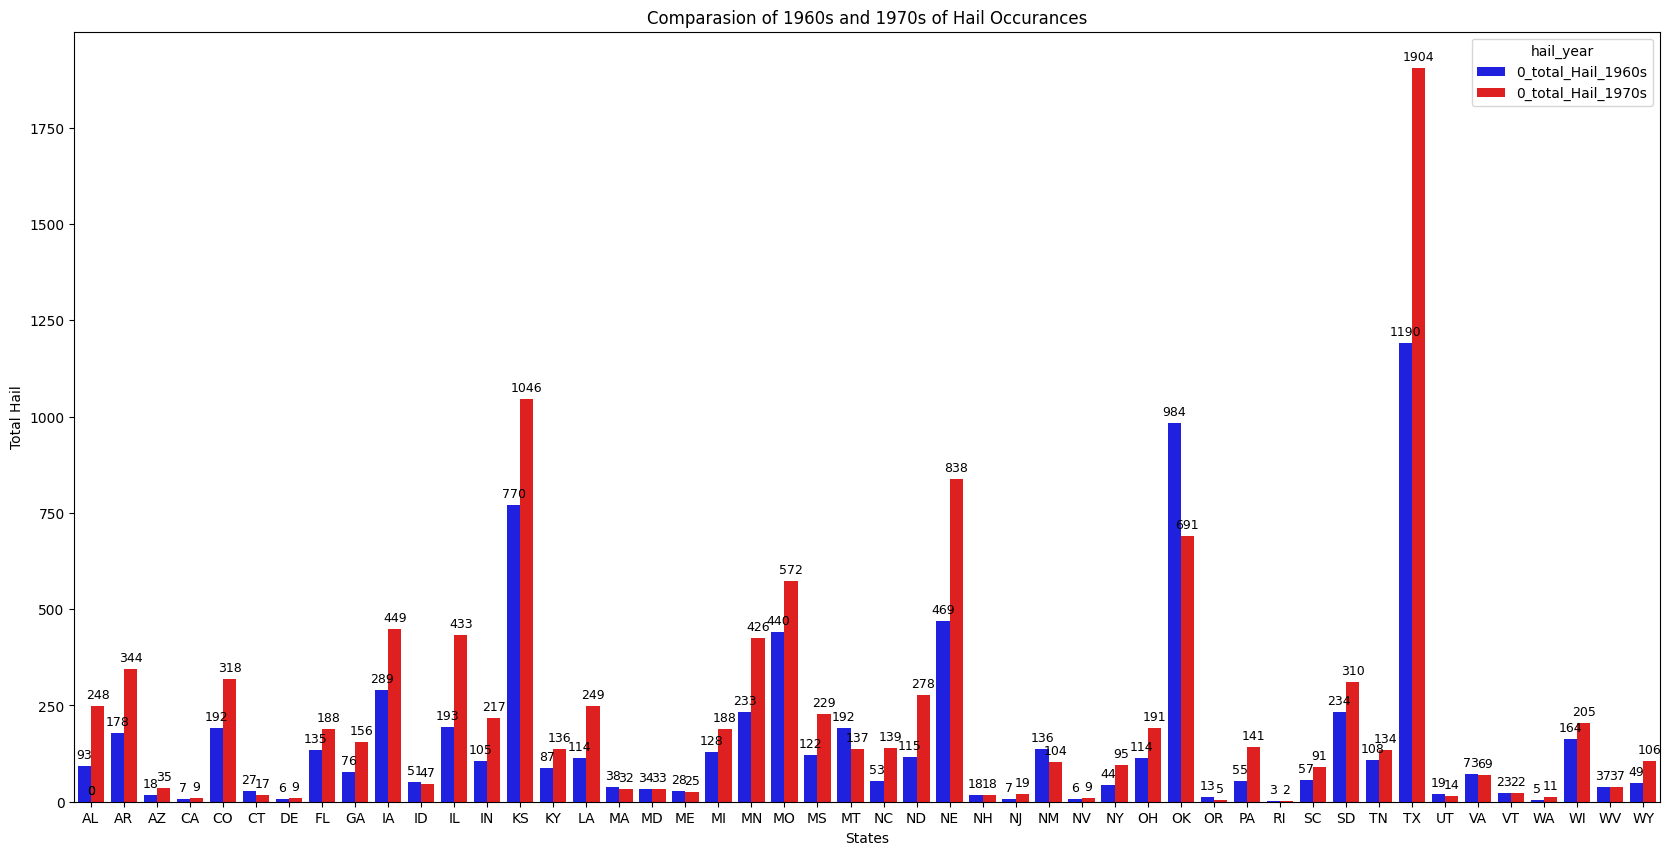

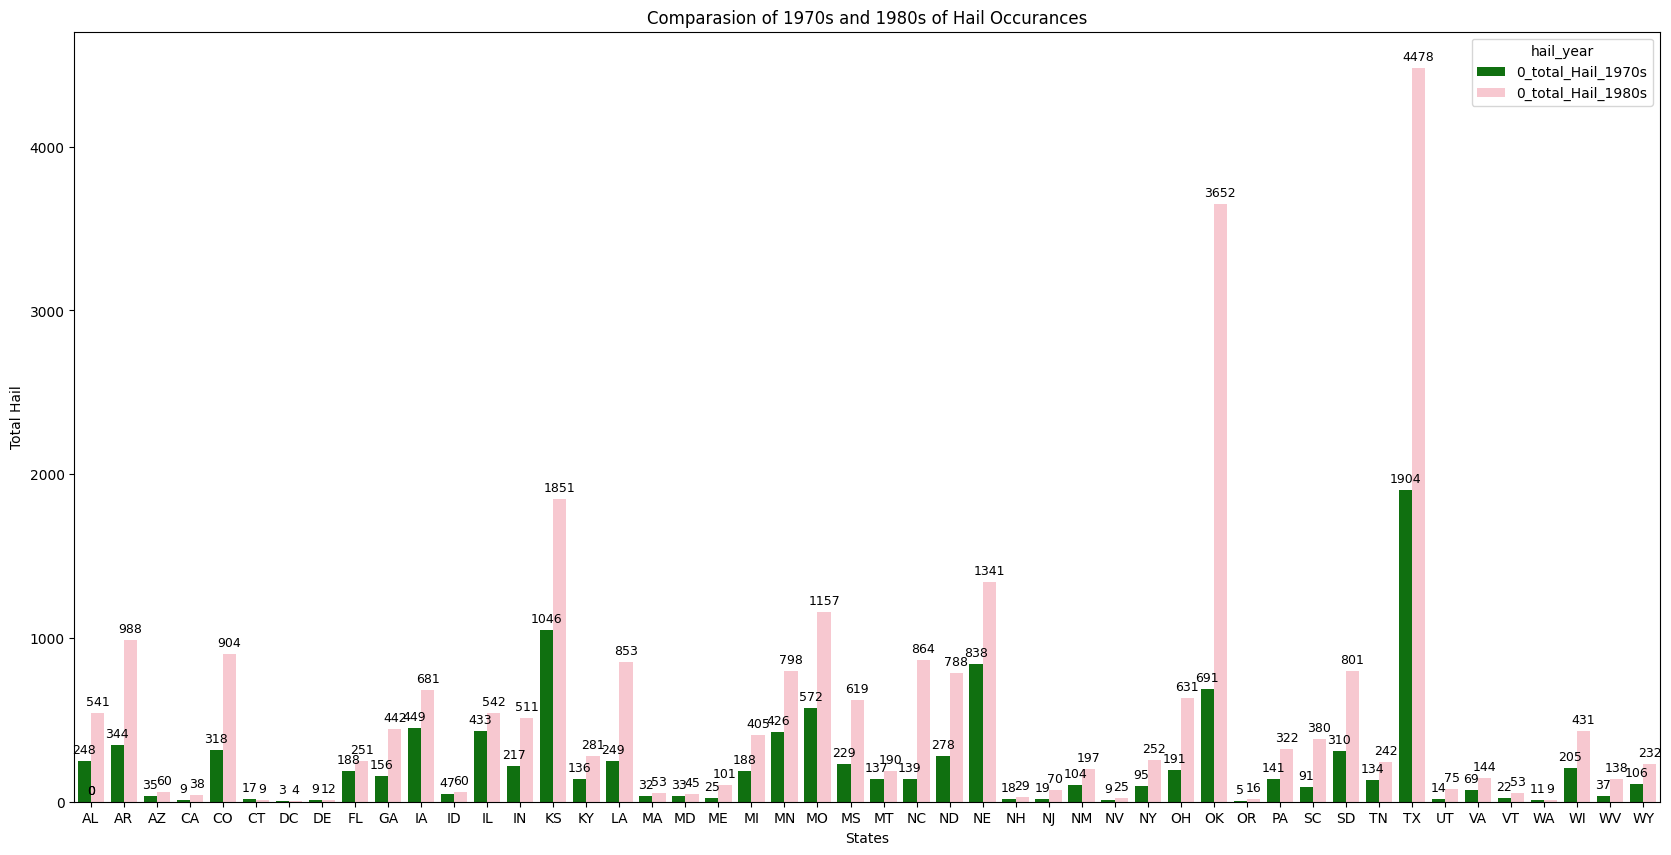

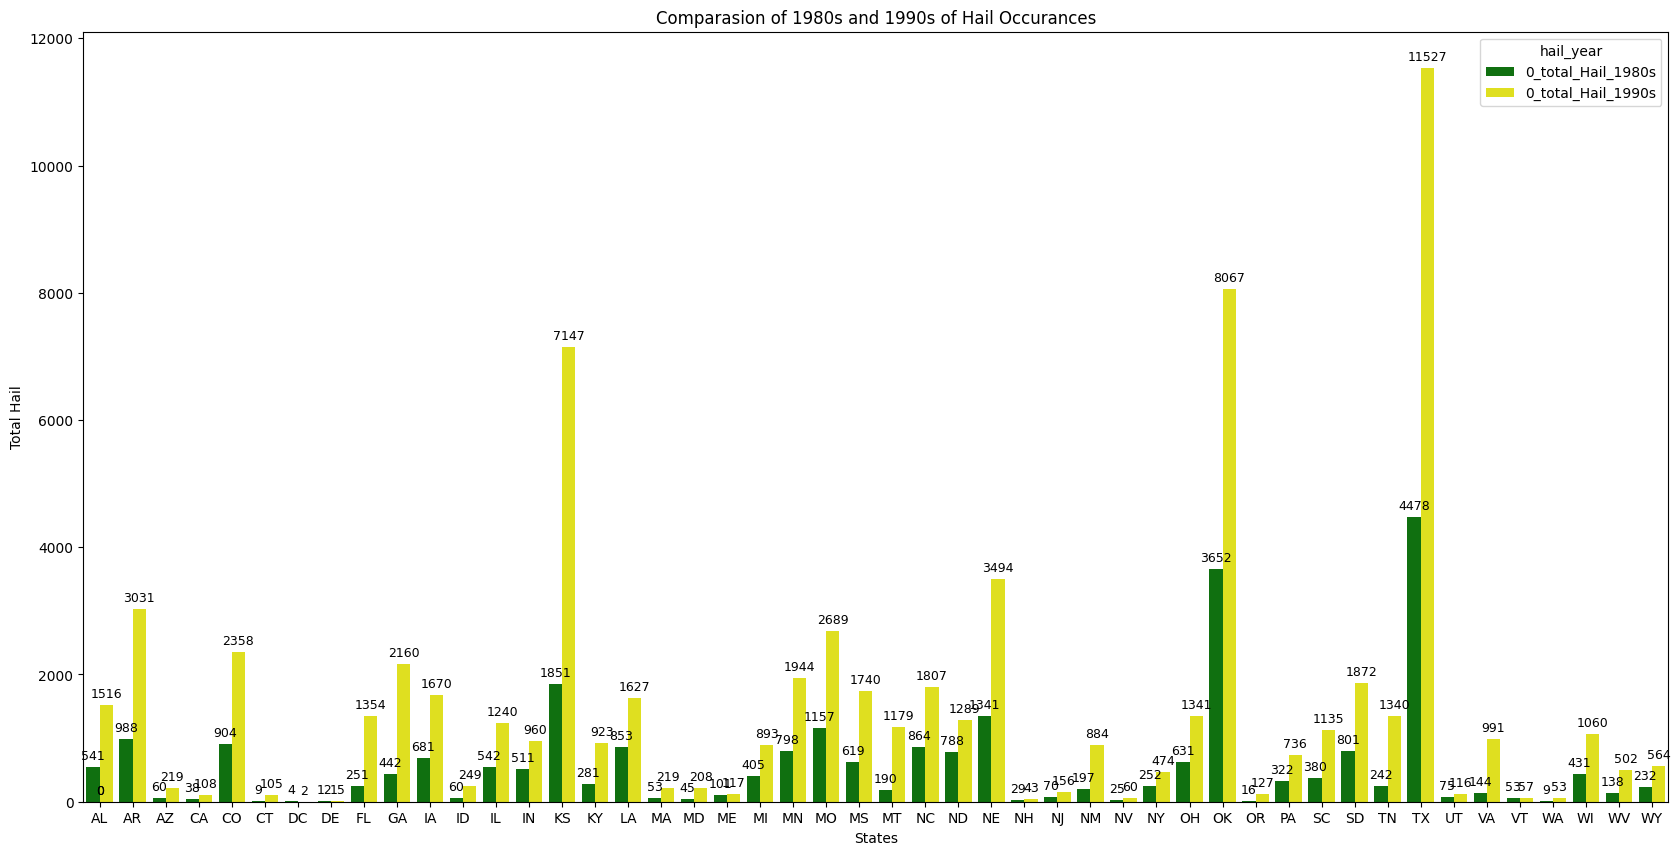

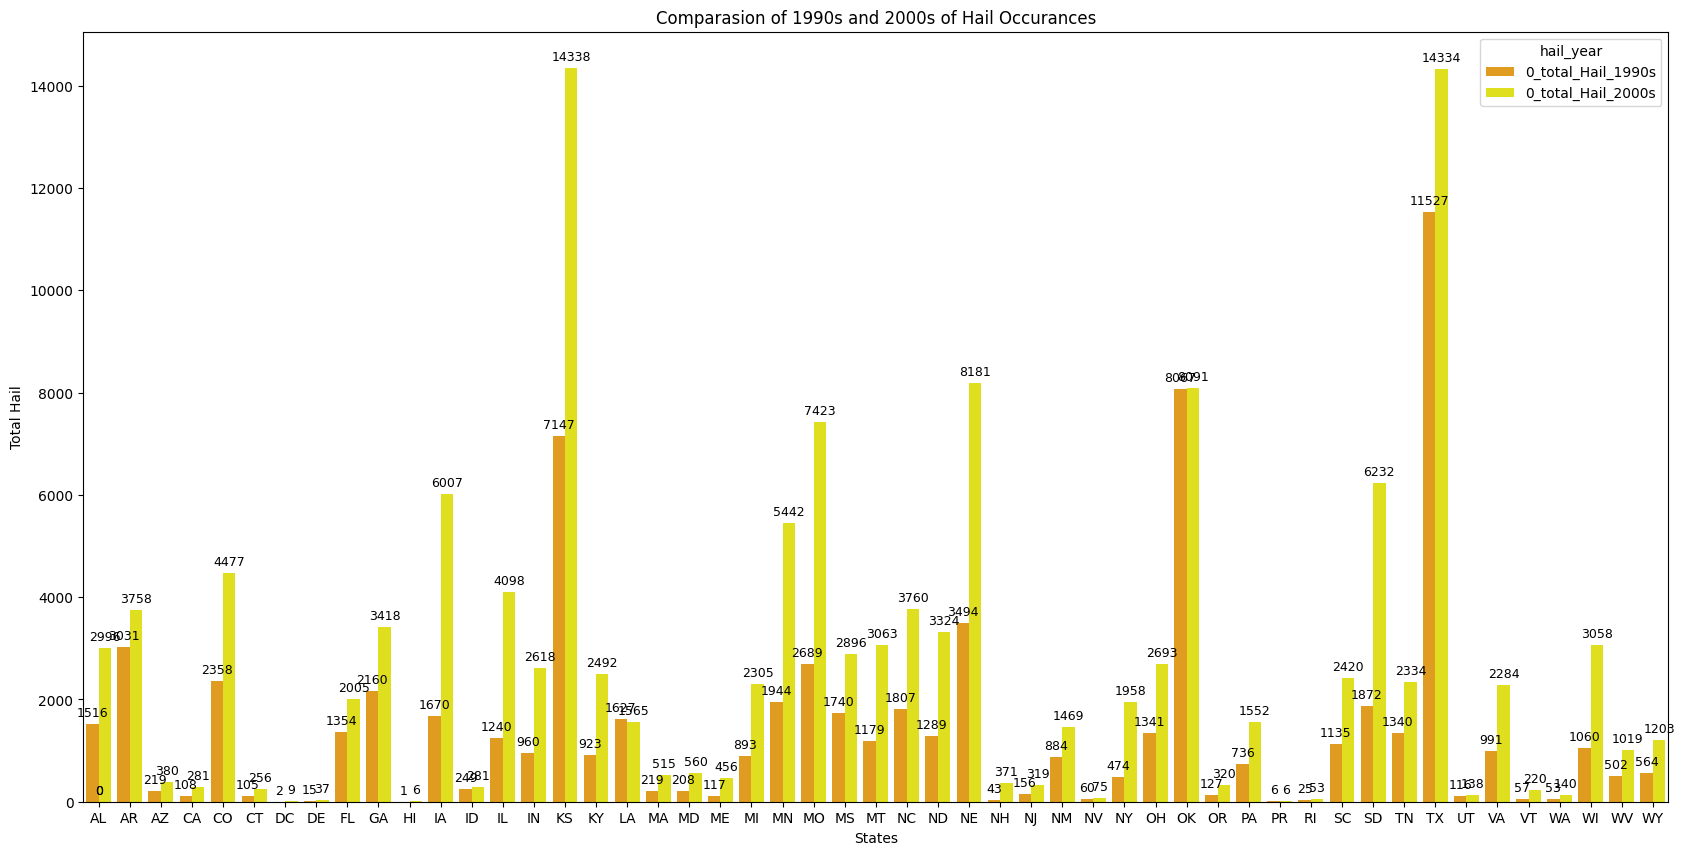

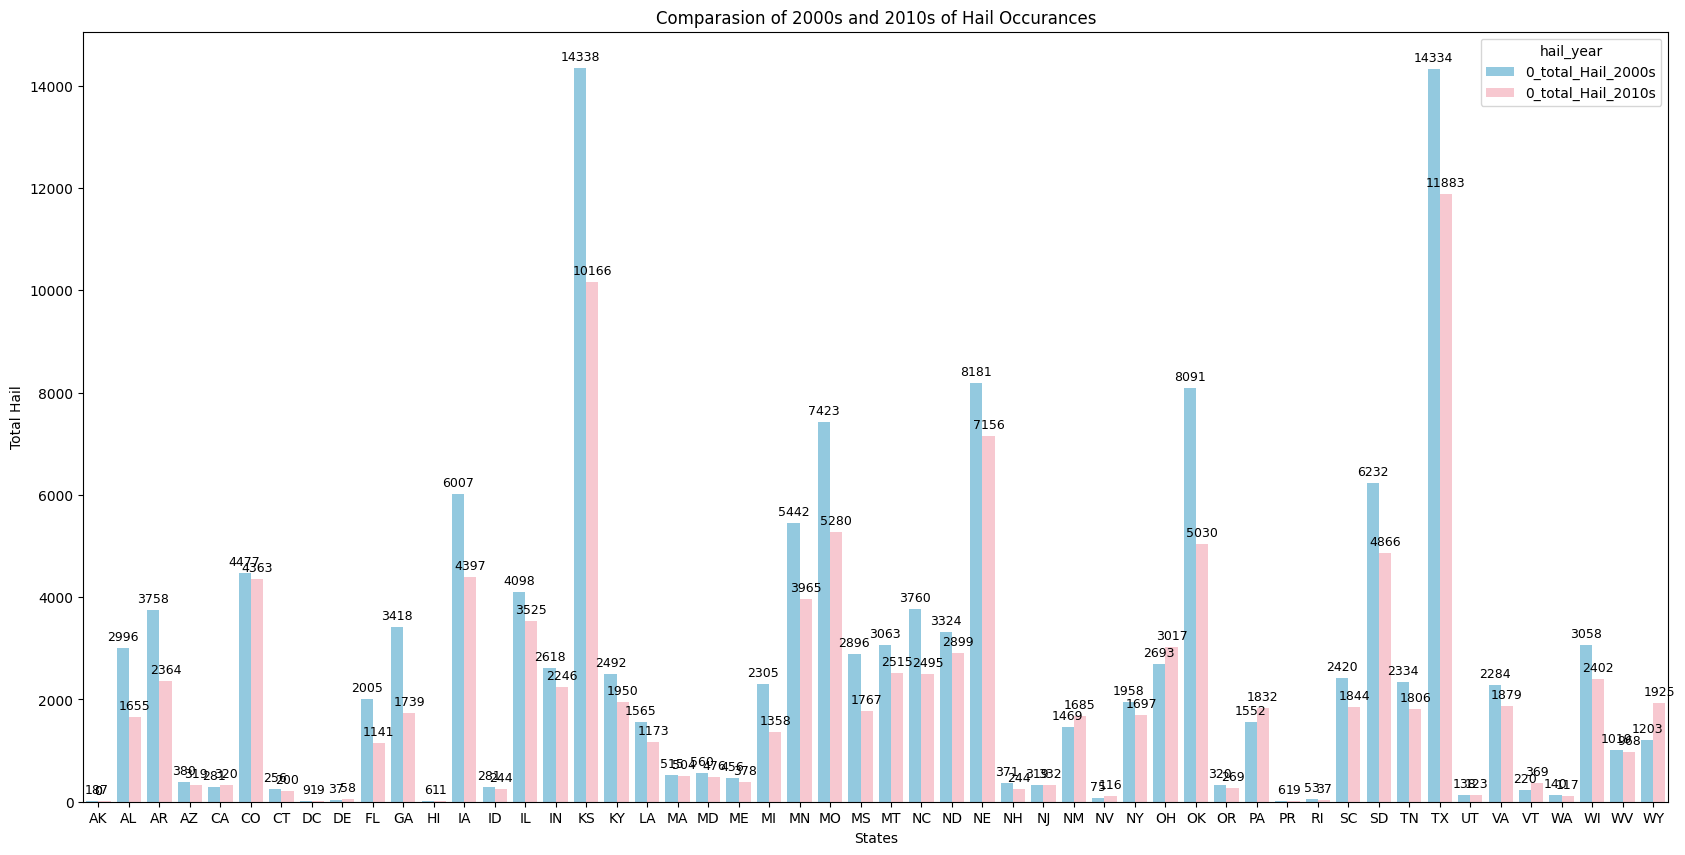

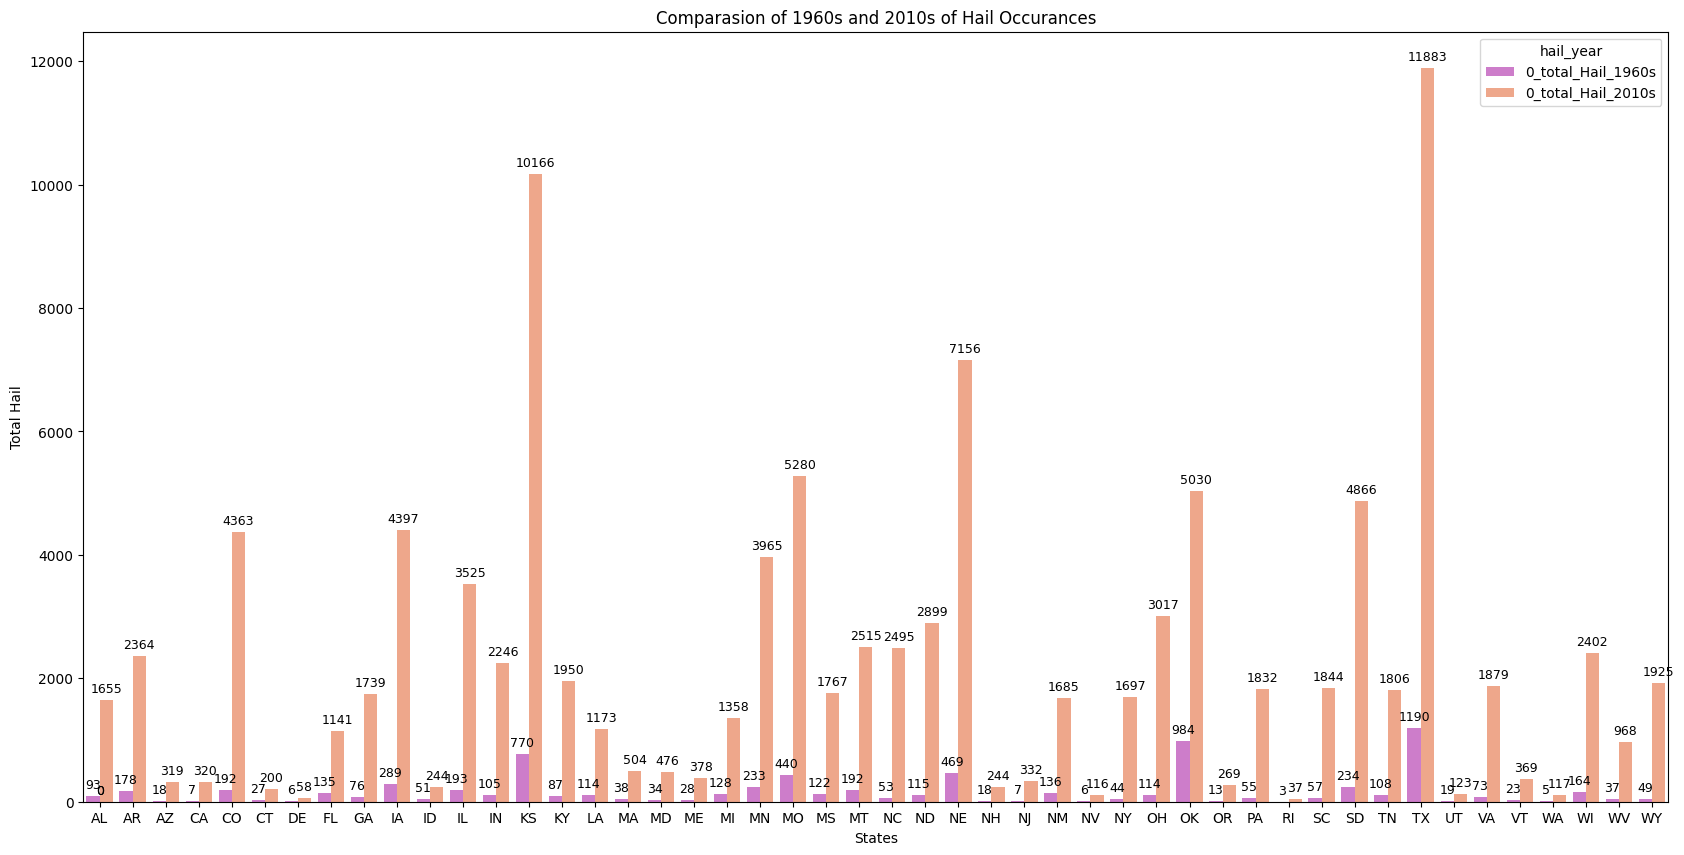

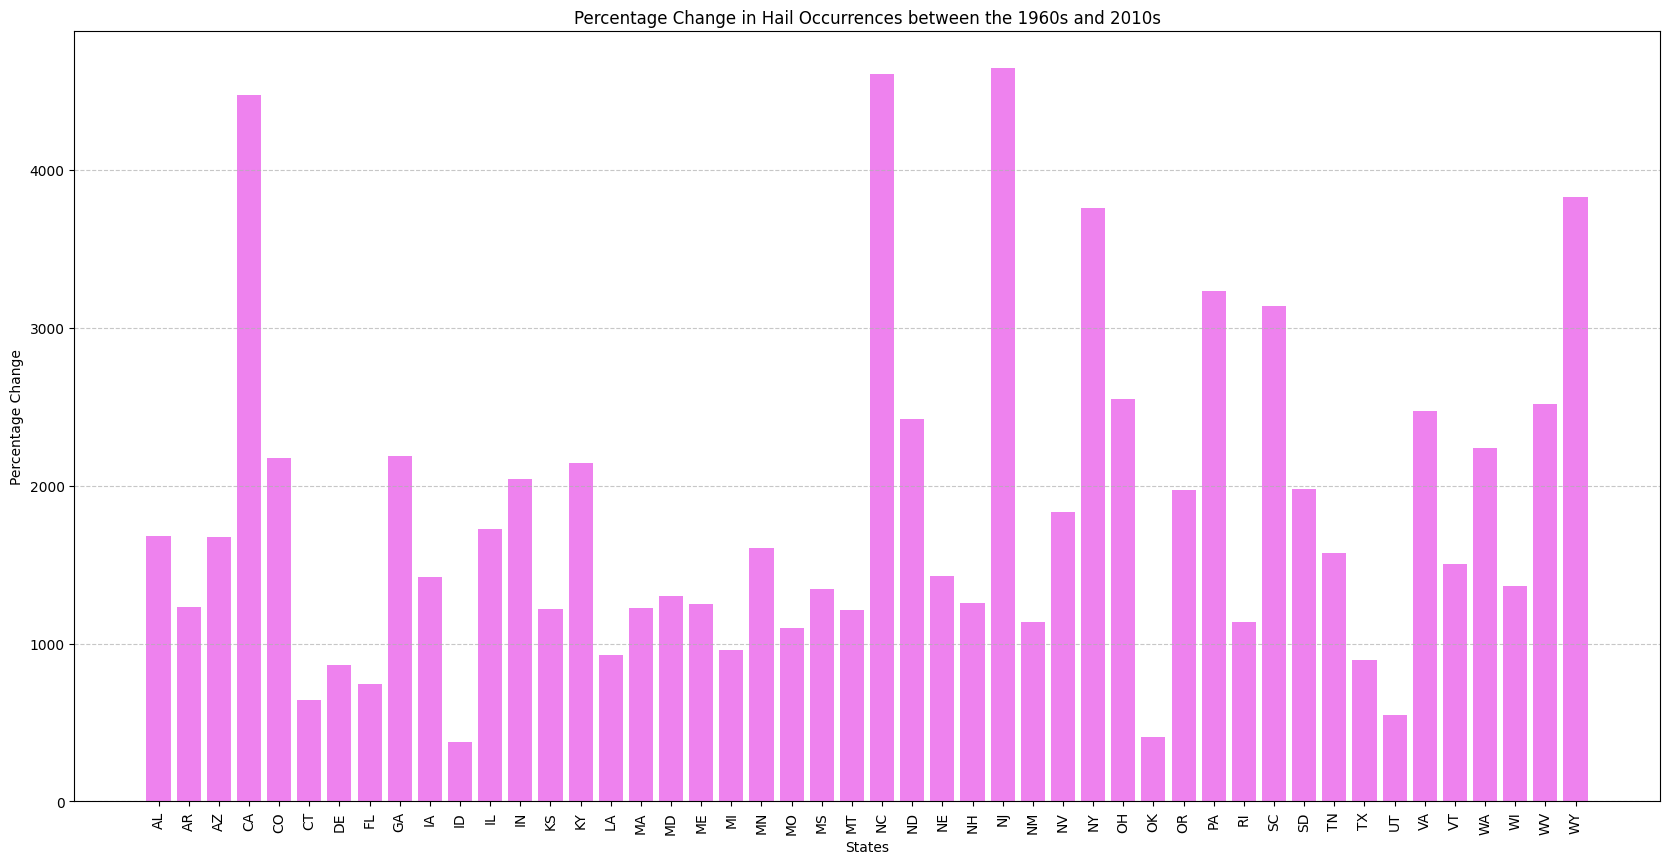

In [9]:
# Noura Almasri's Contribution
# Hail Data:
hail_data = pd.read_csv('1955-2022_hail.csv')
hail_data['state_name'] = hail_data['st']
total_hail_1960s = hail_data[hail_data['yr'].between(1960,1969)].groupby('state_name').size().reset_index()
total_hail_1970s = hail_data[hail_data['yr'].between(1970,1979)].groupby('state_name').size().reset_index()

combined_df = pd.merge(total_hail_1960s, total_hail_1970s, on='state_name', suffixes=('_total_Hail_1960s', '_total_Hail_1970s'))
two_plots = combined_df.melt(id_vars='state_name',var_name='hail_year', value_name='total_hail_1960_1970')
plt.figure(figsize=(45,10))
plt.subplot(1,2,1)
graph1 = sns.barplot(data=two_plots, x ='state_name', y='total_hail_1960_1970',hue='hail_year', palette = ['blue', 'red'])
for bar in graph1.patches:
    graph1.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha = 'center', va='center',
                    size = 9, xytext=(0,8),
                    textcoords='offset points')
plt.title("Comparasion of 1960s and 1970s of Hail Occurances")
plt.xlabel("States")
plt.ylabel("Total Hail")

total_hail_1980s = hail_data[hail_data['yr'].between(1980,1989)].groupby('state_name').size().reset_index()
combined_df1 = pd.merge(total_hail_1970s, total_hail_1980s, on='state_name', suffixes=('_total_Hail_1970s', '_total_Hail_1980s'))
two_plots1 = combined_df1.melt(id_vars='state_name',var_name='hail_year', value_name='total_hail_1970_1980')
plt.figure(figsize=(45,10))
plt.subplot(1,2,1)
graph2 = sns.barplot(data=two_plots1, x ='state_name', y='total_hail_1970_1980',hue='hail_year', palette = ['green', 'pink'])
for bar in graph2.patches:
    graph2.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha = 'center', va='center',
                    size = 9, xytext=(0,8),
                    textcoords='offset points')
plt.title("Comparasion of 1970s and 1980s of Hail Occurances")
plt.xlabel("States")
plt.ylabel("Total Hail")

total_hail_1990s = hail_data[hail_data['yr'].between(1990,1999)].groupby('state_name').size().reset_index()
combined_df1 = pd.merge(total_hail_1980s, total_hail_1990s, on='state_name', suffixes=('_total_Hail_1980s', '_total_Hail_1990s'))
two_plots1 = combined_df1.melt(id_vars='state_name',var_name='hail_year', value_name='total_hail_1980_1990')
plt.figure(figsize=(45,10))
plt.subplot(1,2,1)
graph3 = sns.barplot(data=two_plots1, x ='state_name', y='total_hail_1980_1990',hue='hail_year', palette = ['green', 'yellow'])
for bar in graph3.patches:
    graph3.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha = 'center', va='center',
                    size = 9, xytext=(0,8),
                    textcoords='offset points')
plt.title("Comparasion of 1980s and 1990s of Hail Occurances")
plt.xlabel("States")
plt.ylabel("Total Hail")


total_hail_2000s = hail_data[hail_data['yr'].between(2000,2009)].groupby('state_name').size().reset_index()
combined_df1 = pd.merge(total_hail_1990s, total_hail_2000s, on='state_name', suffixes=('_total_Hail_1990s', '_total_Hail_2000s'))
two_plots1 = combined_df1.melt(id_vars='state_name',var_name='hail_year', value_name='total_hail_1990_2000')
plt.figure(figsize=(45,10))
plt.subplot(1,2,1)
graph4 = sns.barplot(data=two_plots1, x ='state_name', y='total_hail_1990_2000',hue='hail_year', palette = ['orange', 'yellow'])
for bar in graph4.patches:
    graph4.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha = 'center', va='center',
                    size = 9, xytext=(0,8),
                    textcoords='offset points')
plt.title("Comparasion of 1990s and 2000s of Hail Occurances")
plt.xlabel("States")
plt.ylabel("Total Hail")


total_hail_2010s = hail_data[hail_data['yr'].between(2010,2019)].groupby('state_name').size().reset_index()
combined_df1 = pd.merge(total_hail_2000s, total_hail_2010s, on='state_name', suffixes=('_total_Hail_2000s', '_total_Hail_2010s'))
two_plots1 = combined_df1.melt(id_vars='state_name',var_name='hail_year', value_name='total_hail_2000_2010')
plt.figure(figsize=(45,10))
plt.subplot(1,2,1)
graph5 = sns.barplot(data=two_plots1, x ='state_name', y='total_hail_2000_2010',hue='hail_year', palette = ['skyblue', 'pink'])
for bar in graph5.patches:
    graph5.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha = 'center', va='center',
                    size = 9, xytext=(0,8),
                    textcoords='offset points')
plt.title("Comparasion of 2000s and 2010s of Hail Occurances")
plt.xlabel("States")
plt.ylabel("Total Hail")

combined_df1 = pd.merge(total_hail_1960s, total_hail_2010s, on='state_name', suffixes=('_total_Hail_1960s', '_total_Hail_2010s'))
two_plots1 = combined_df1.melt(id_vars='state_name',var_name='hail_year', value_name='total_hail_1960_2010')
plt.figure(figsize=(45,10))
plt.subplot(1,2,1)
graph6 = sns.barplot(data=two_plots1, x ='state_name', y='total_hail_1960_2010',hue='hail_year', palette = ['orchid', 'lightSalmon'])
for bar in graph6.patches:
    graph6.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha = 'center', va='center',
                    size = 9, xytext=(0,8),
                    textcoords='offset points')
plt.title("Comparasion of 1960s and 2010s of Hail Occurances")
plt.xlabel("States")
plt.ylabel("Total Hail")
###Percentage increase/decrease#######

percentage_changes = {}

total_count_1960s = hail_data[hail_data['yr'].between(1960,1969)].groupby('state_name').size().reset_index()
total_count_2010s = hail_data[hail_data['yr'].between(2010,2019)].groupby('state_name').size().reset_index()
merged_counts = pd.merge(total_count_1960s, total_count_2010s, on ='state_name', suffixes = ('_1960s', '_2010s'))
merged_counts['percentage_change'] = ((merged_counts['0_2010s'] - merged_counts['0_1960s']) / merged_counts['0_1960s'])*100
plt.figure(figsize=(45,10))
plt.subplot(1,2,1)
plt.bar(merged_counts['state_name'], merged_counts['percentage_change'], color=['violet' if x > 0 else 'red' for x in merged_counts['percentage_change']])
plt.title('Percentage Change in Hail Occurrences between the 1960s and 2010s')
plt.xlabel('States')
plt.ylabel('Percentage Change')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Explanation for Hail occurances:
The above graphs represent a visualization of the hail occurances from 1960 to 2019. The first 6 graphs show the comparasion the decade vs how much hail has occured that decade. The last graph shows the percentage increase/decrease of hail occurances in the 1960s compared to the 2010 decade.

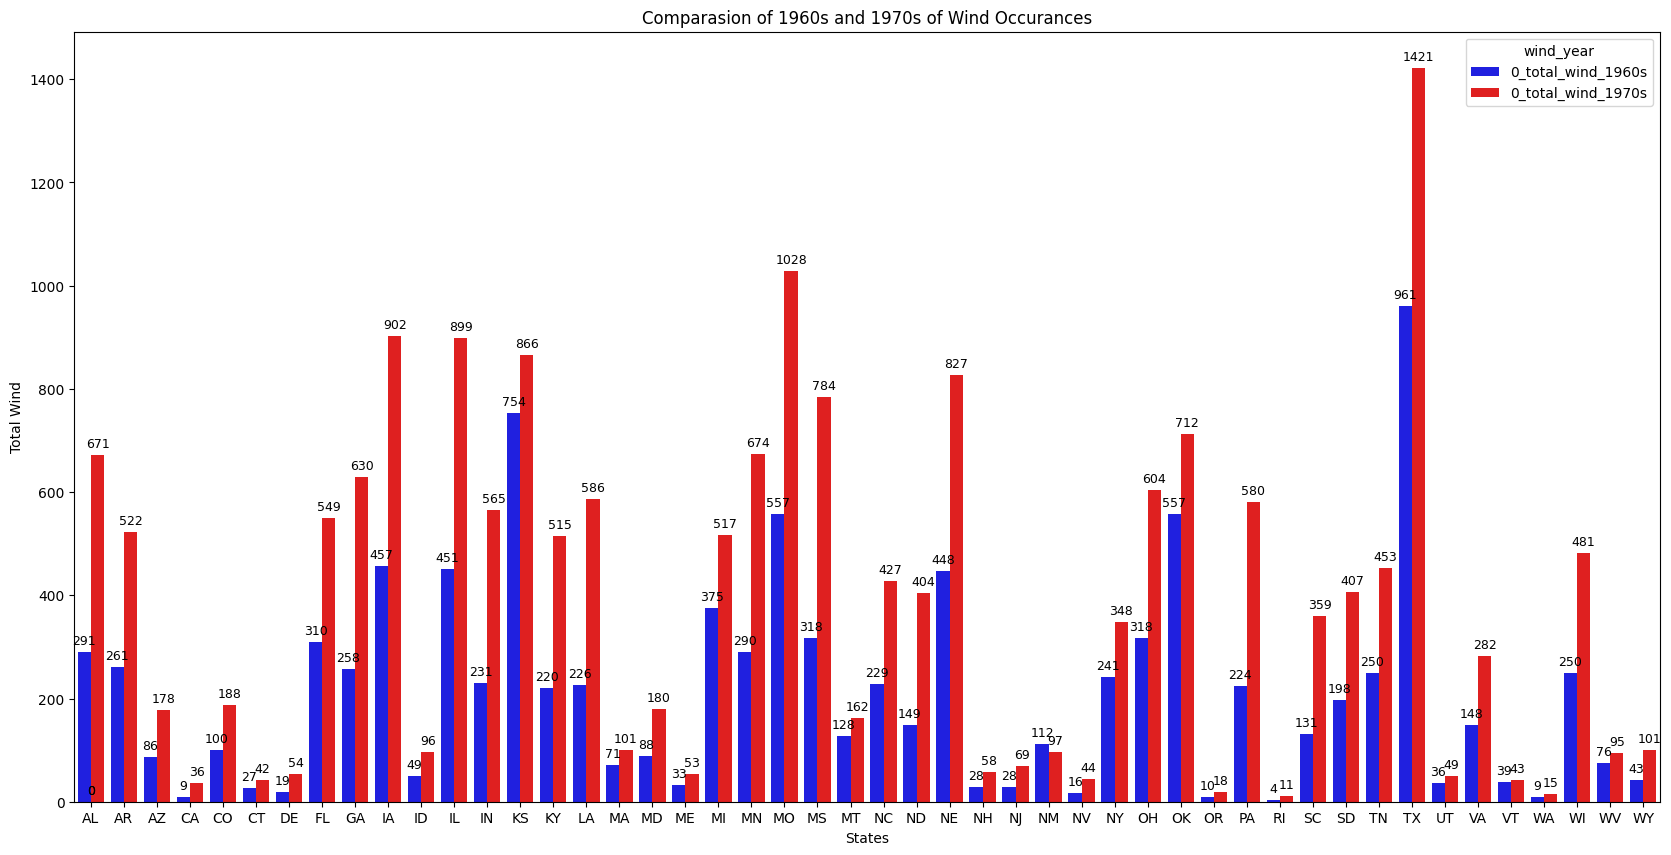

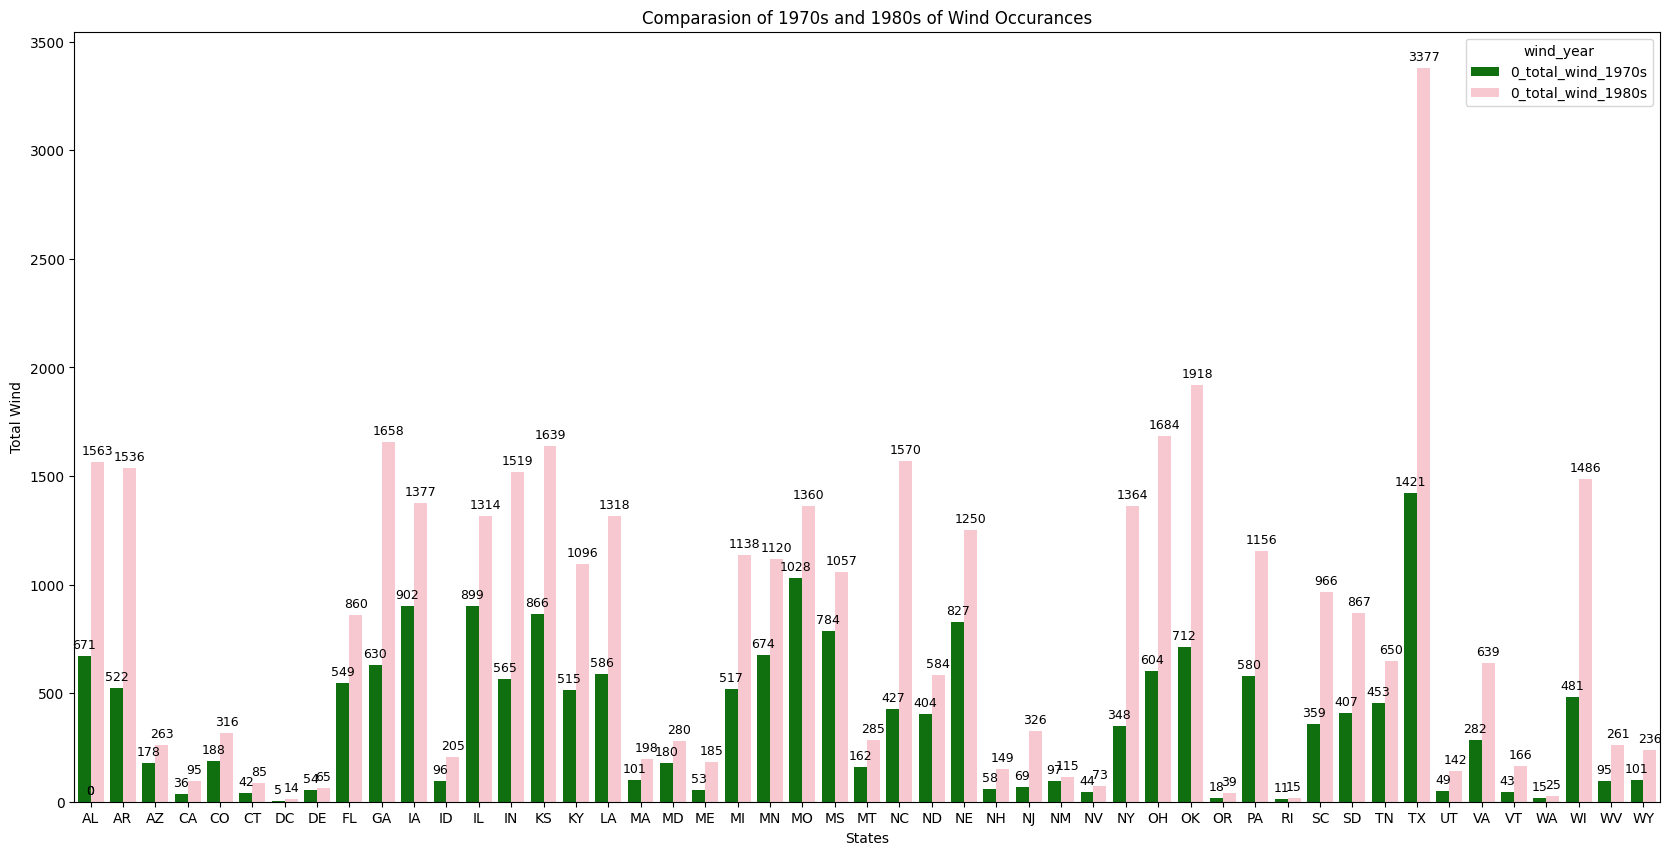

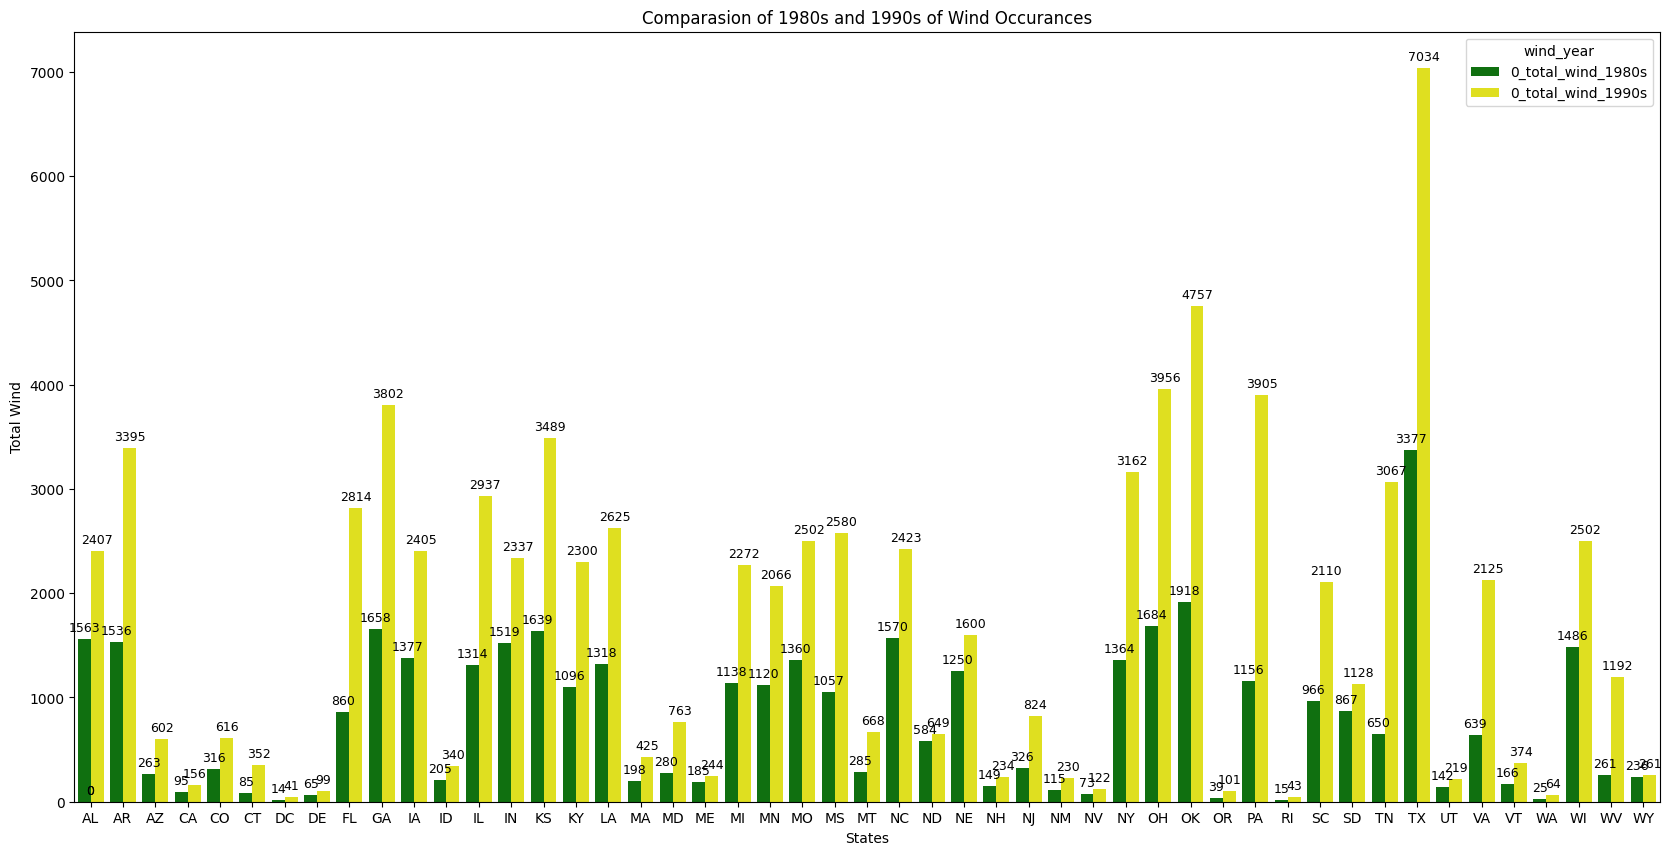

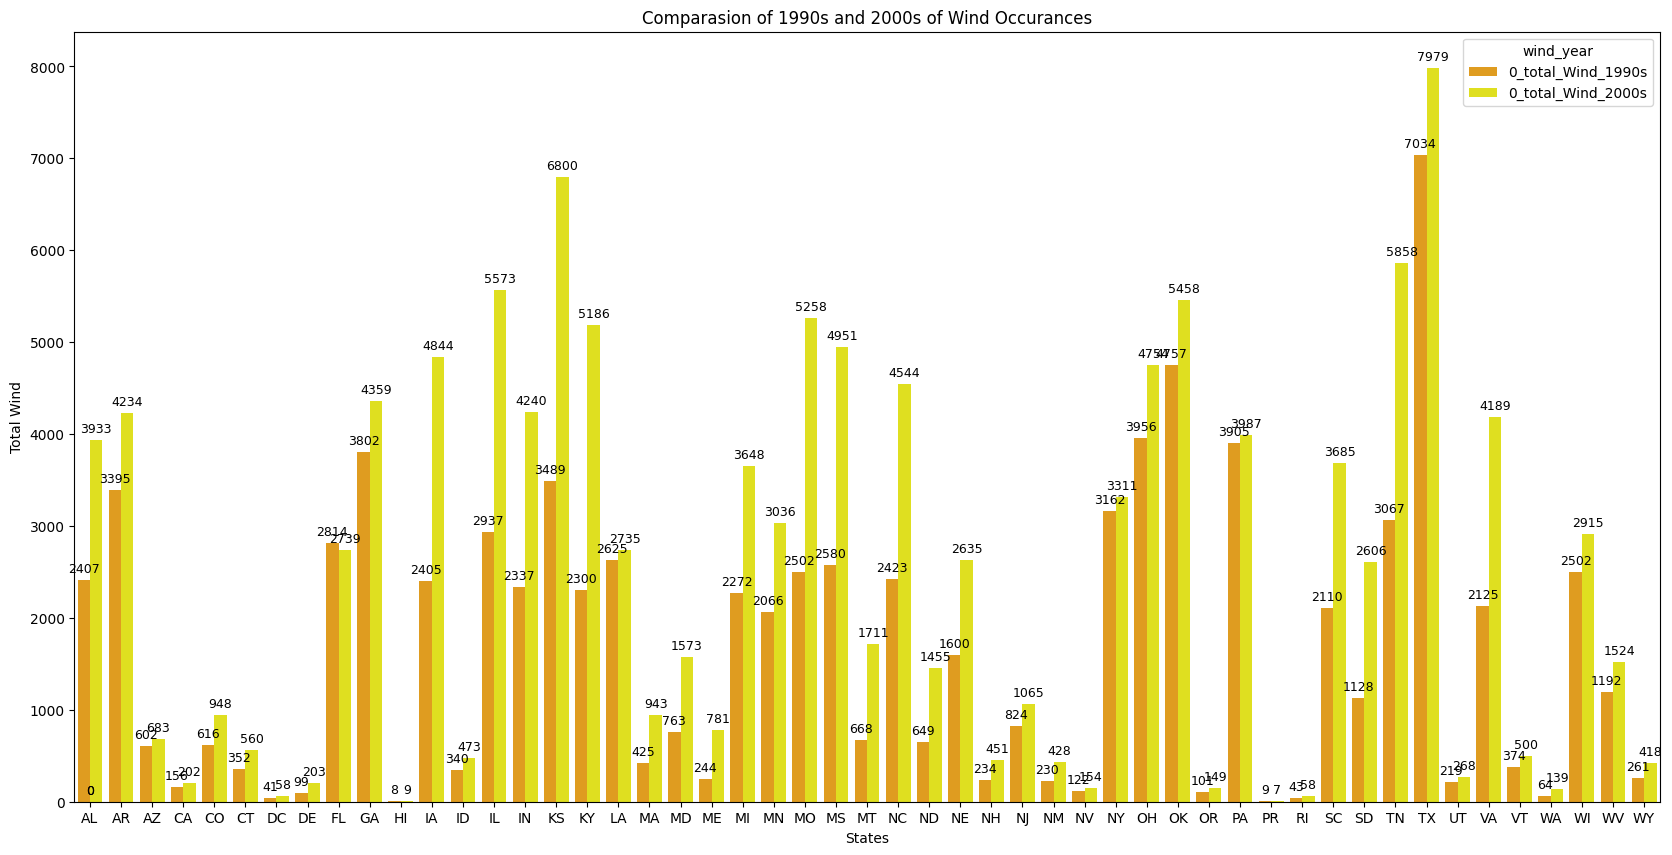

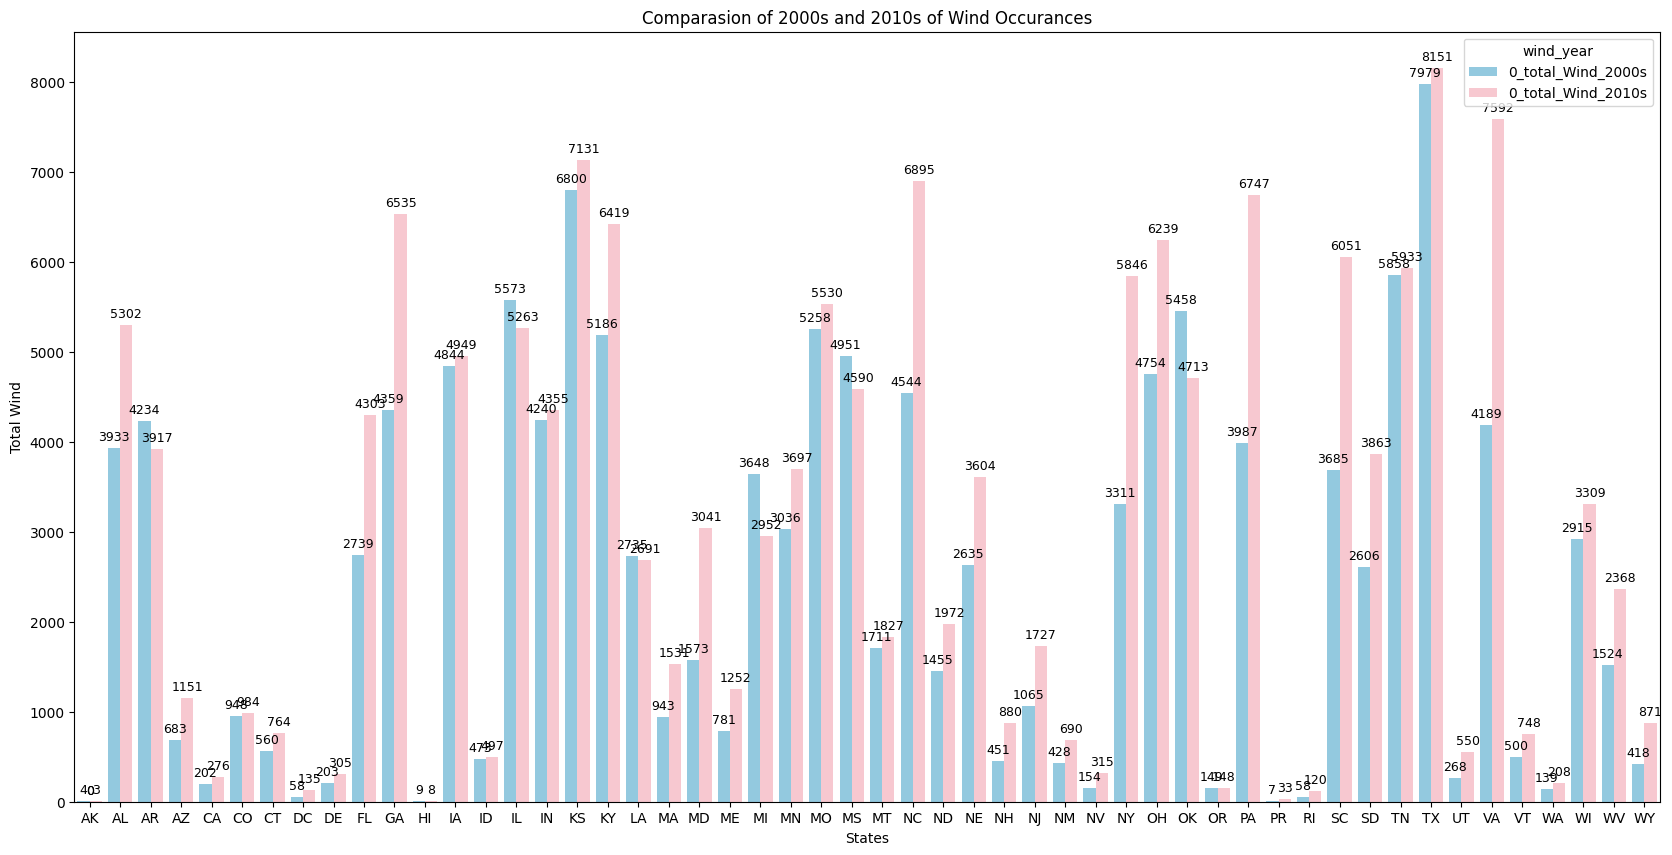

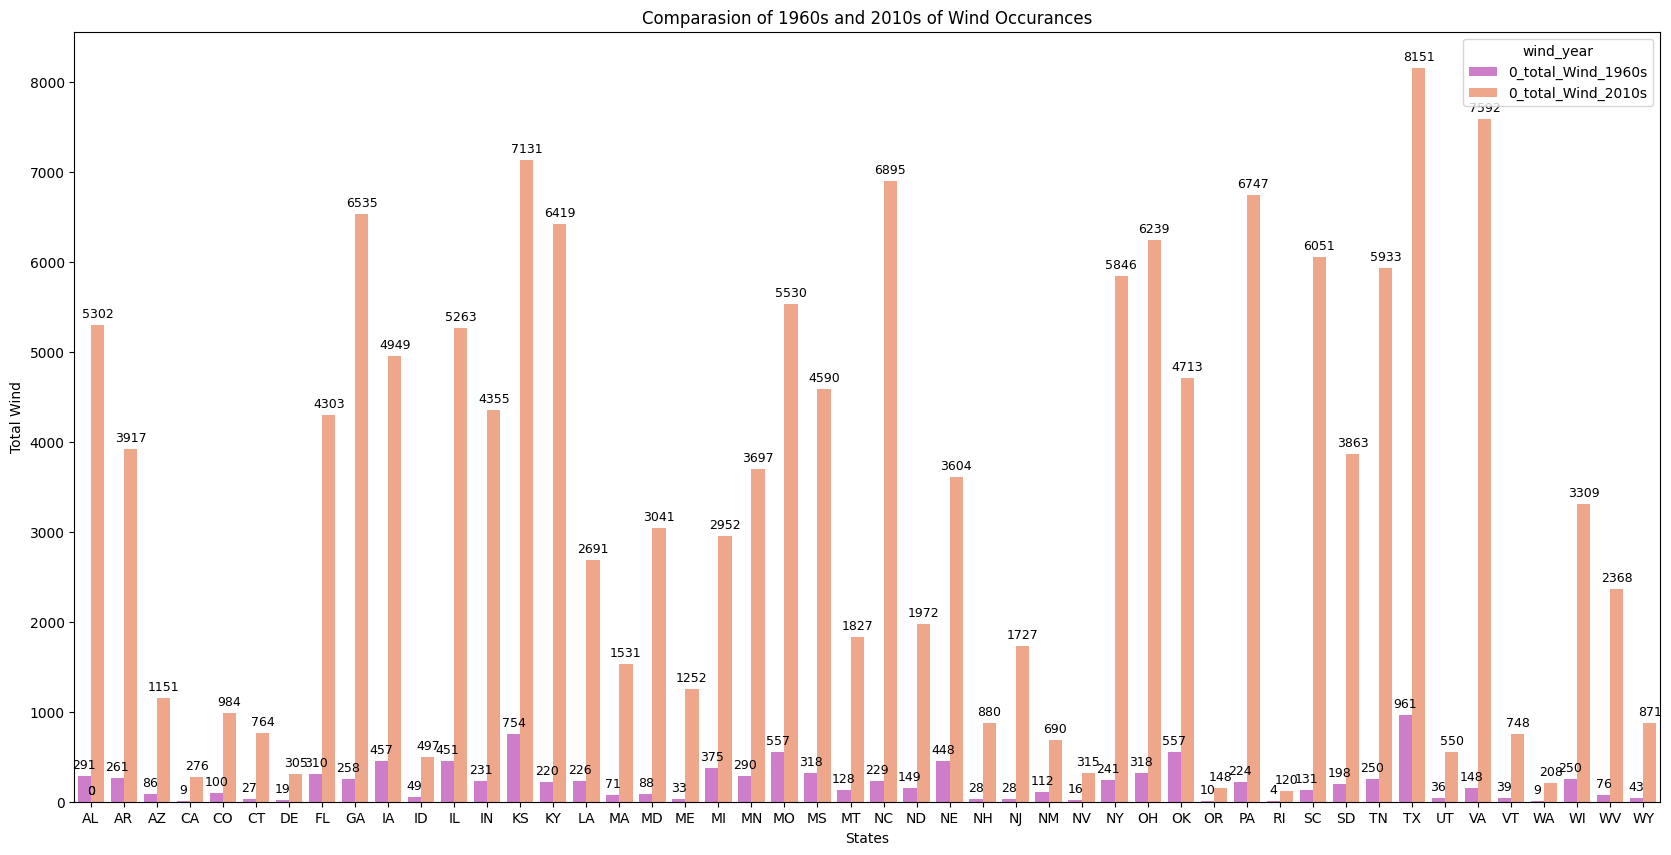

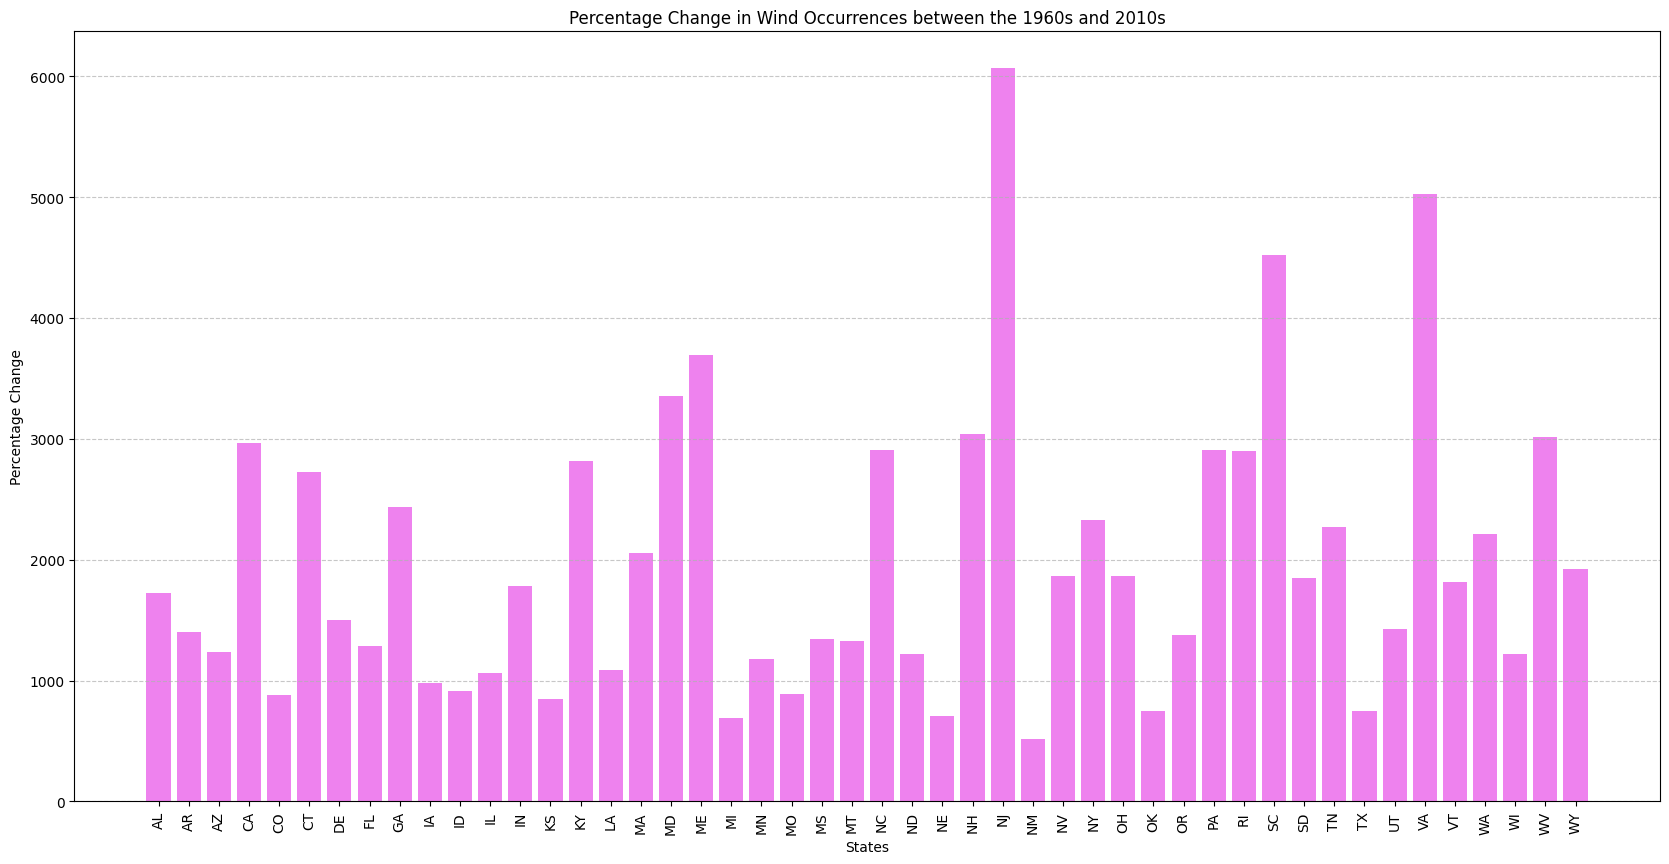

In [10]:
# Noura Almasri's Contribution
# Wind Data:
import warnings
warnings.filterwarnings('ignore')
wind_data = pd.read_csv('1955-2022_wind.csv')
wind_data['state_name'] = wind_data['st']
total_wind_1960s = wind_data[wind_data['yr'].between(1960,1969)].groupby('state_name').size().reset_index()
total_wind_1970s = wind_data[wind_data['yr'].between(1970,1979)].groupby('state_name').size().reset_index()

combined_df = pd.merge(total_wind_1960s, total_wind_1970s, on='state_name', suffixes=('_total_wind_1960s', '_total_wind_1970s'))
two_plots = combined_df.melt(id_vars='state_name',var_name='wind_year', value_name='total_wind_1960_1970')
plt.figure(figsize=(45,10))
plt.subplot(1,2,1)
graph1 = sns.barplot(data=two_plots, x ='state_name', y='total_wind_1960_1970',hue='wind_year', palette = ['blue', 'red'])
for bar in graph1.patches:
    graph1.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha = 'center', va='center',
                    size = 9, xytext=(0,8),
                    textcoords='offset points')
plt.title("Comparasion of 1960s and 1970s of Wind Occurances")
plt.xlabel("States")
plt.ylabel("Total Wind")

total_wind_1980s = wind_data[wind_data['yr'].between(1980,1989)].groupby('state_name').size().reset_index()
combined_df1 = pd.merge(total_wind_1970s, total_wind_1980s, on='state_name', suffixes=('_total_wind_1970s', '_total_wind_1980s'))
two_plots1 = combined_df1.melt(id_vars='state_name',var_name='wind_year', value_name='total_wind_1970_1980')
plt.figure(figsize=(45,10))
plt.subplot(1,2,1)
graph2 = sns.barplot(data=two_plots1, x ='state_name', y='total_wind_1970_1980',hue='wind_year', palette = ['green', 'pink'])
for bar in graph2.patches:
    graph2.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha = 'center', va='center',
                    size = 9, xytext=(0,8),
                    textcoords='offset points')
plt.title("Comparasion of 1970s and 1980s of Wind Occurances")
plt.xlabel("States")
plt.ylabel("Total Wind")

total_wind_1990s = wind_data[wind_data['yr'].between(1990,1999)].groupby('state_name').size().reset_index()
combined_df1 = pd.merge(total_wind_1980s, total_wind_1990s, on='state_name', suffixes=('_total_wind_1980s', '_total_wind_1990s'))
two_plots1 = combined_df1.melt(id_vars='state_name',var_name='wind_year', value_name='total_wind_1980_1990')
plt.figure(figsize=(45,10))
plt.subplot(1,2,1)
graph3 = sns.barplot(data=two_plots1, x ='state_name', y='total_wind_1980_1990',hue='wind_year', palette = ['green', 'yellow'])
for bar in graph3.patches:
    graph3.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha = 'center', va='center',
                    size = 9, xytext=(0,8),
                    textcoords='offset points')
plt.title("Comparasion of 1980s and 1990s of Wind Occurances")
plt.xlabel("States")
plt.ylabel("Total Wind")


total_wind_2000s = wind_data[wind_data['yr'].between(2000,2009)].groupby('state_name').size().reset_index()
combined_df1 = pd.merge(total_wind_1990s, total_wind_2000s, on='state_name', suffixes=('_total_Wind_1990s', '_total_Wind_2000s'))
two_plots1 = combined_df1.melt(id_vars='state_name',var_name='wind_year', value_name='total_wind_1990_2000')
plt.figure(figsize=(45,10))
plt.subplot(1,2,1)
graph4 = sns.barplot(data=two_plots1, x ='state_name', y='total_wind_1990_2000',hue='wind_year', palette = ['orange', 'yellow'])
for bar in graph4.patches:
    graph4.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha = 'center', va='center',
                    size = 9, xytext=(0,8),
                    textcoords='offset points')
plt.title("Comparasion of 1990s and 2000s of Wind Occurances")
plt.xlabel("States")
plt.ylabel("Total Wind")


total_wind_2010s = wind_data[wind_data['yr'].between(2010,2019)].groupby('state_name').size().reset_index()
combined_df1 = pd.merge(total_wind_2000s, total_wind_2010s, on='state_name', suffixes=('_total_Wind_2000s', '_total_Wind_2010s'))
two_plots1 = combined_df1.melt(id_vars='state_name',var_name='wind_year', value_name='total_wind_2000_2010')
plt.figure(figsize=(45,10))
plt.subplot(1,2,1)
graph5 = sns.barplot(data=two_plots1, x ='state_name', y='total_wind_2000_2010',hue='wind_year', palette = ['skyblue', 'pink'])
for bar in graph5.patches:
    graph5.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha = 'center', va='center',
                    size = 9, xytext=(0,8),
                    textcoords='offset points')
plt.title("Comparasion of 2000s and 2010s of Wind Occurances")
plt.xlabel("States")
plt.ylabel("Total Wind")

combined_df1 = pd.merge(total_wind_1960s, total_wind_2010s, on='state_name', suffixes=('_total_Wind_1960s', '_total_Wind_2010s'))
two_plots1 = combined_df1.melt(id_vars='state_name',var_name='wind_year', value_name='total_wind_1960_2010')
plt.figure(figsize=(45,10))
plt.subplot(1,2,1)
graph6 = sns.barplot(data=two_plots1, x ='state_name', y='total_wind_1960_2010',hue='wind_year', palette = ['orchid', 'lightSalmon'])
for bar in graph6.patches:
    graph6.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha = 'center', va='center',
                    size = 9, xytext=(0,8),
                    textcoords='offset points')
plt.title("Comparasion of 1960s and 2010s of Wind Occurances")
plt.xlabel("States")
plt.ylabel("Total Wind")
###Percentage increase/decrease#######

percentage_changes = {}

total_count_1960s = wind_data[wind_data['yr'].between(1960,1969)].groupby('state_name').size().reset_index()
total_count_2010s = wind_data[wind_data['yr'].between(2010,2019)].groupby('state_name').size().reset_index()
merged_counts = pd.merge(total_count_1960s, total_count_2010s, on ='state_name', suffixes = ('_1960s', '_2010s'))
merged_counts['percentage_change'] = ((merged_counts['0_2010s'] - merged_counts['0_1960s']) / merged_counts['0_1960s'])*100
plt.figure(figsize=(45,10))
plt.subplot(1,2,1)
plt.bar(merged_counts['state_name'], merged_counts['percentage_change'], color=['violet' if x > 0 else 'red' for x in merged_counts['percentage_change']])
plt.title('Percentage Change in Wind Occurrences between the 1960s and 2010s')
plt.xlabel('States')
plt.ylabel('Percentage Change')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Explantion for Wind Occurances:
The above graphs represent a visualization of the Wind occurances from 1960 to 2019. The first 6 graphs show the comparasion the decade vs how much hail has occured that decade. The last graph shows the percentage increase/decrease of wind occurances in the 1960s compared to the 2010 decade if the wind increased it will show in a vilot color but if it decreased it will show in a red color and as seen on the graph all wind data had an increase in wind occurances.


<Figure size 1800x600 with 0 Axes>

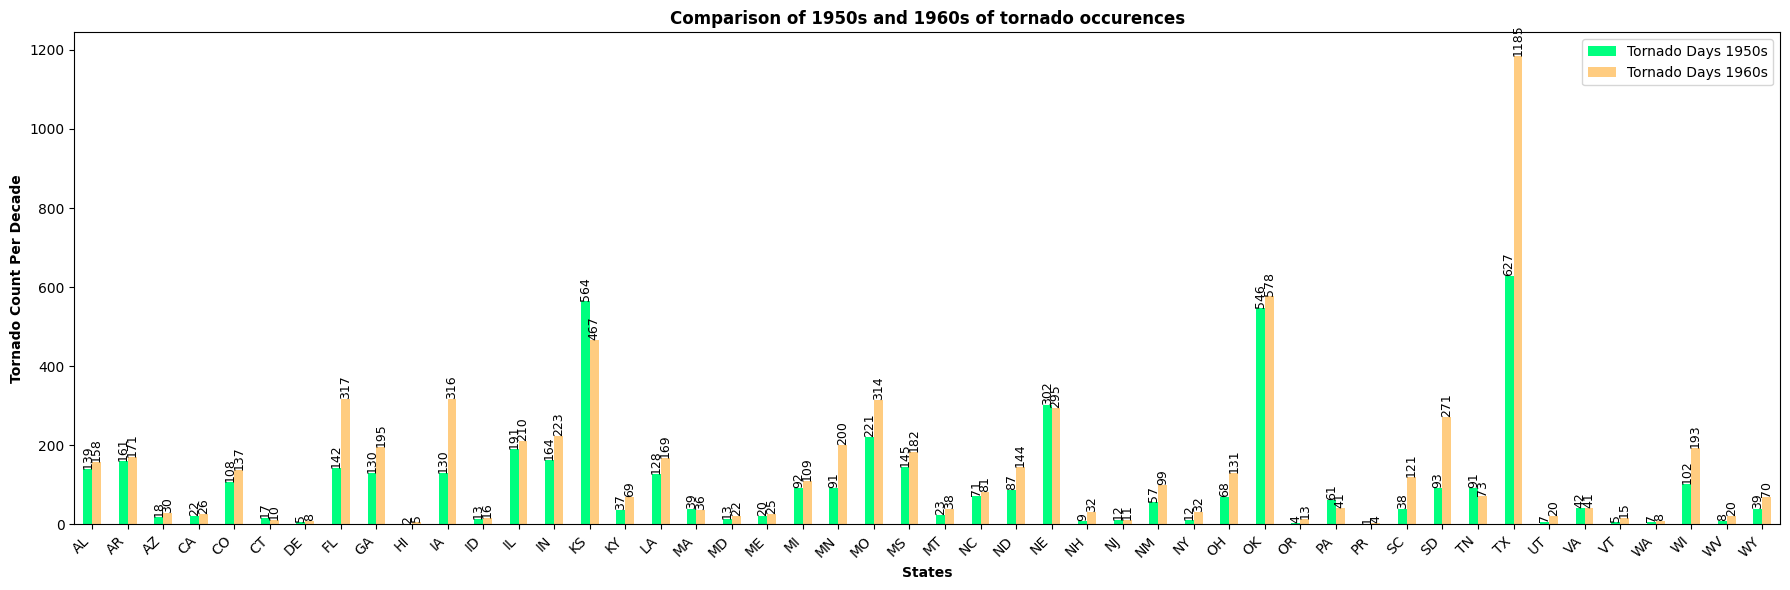

<Figure size 1800x600 with 0 Axes>

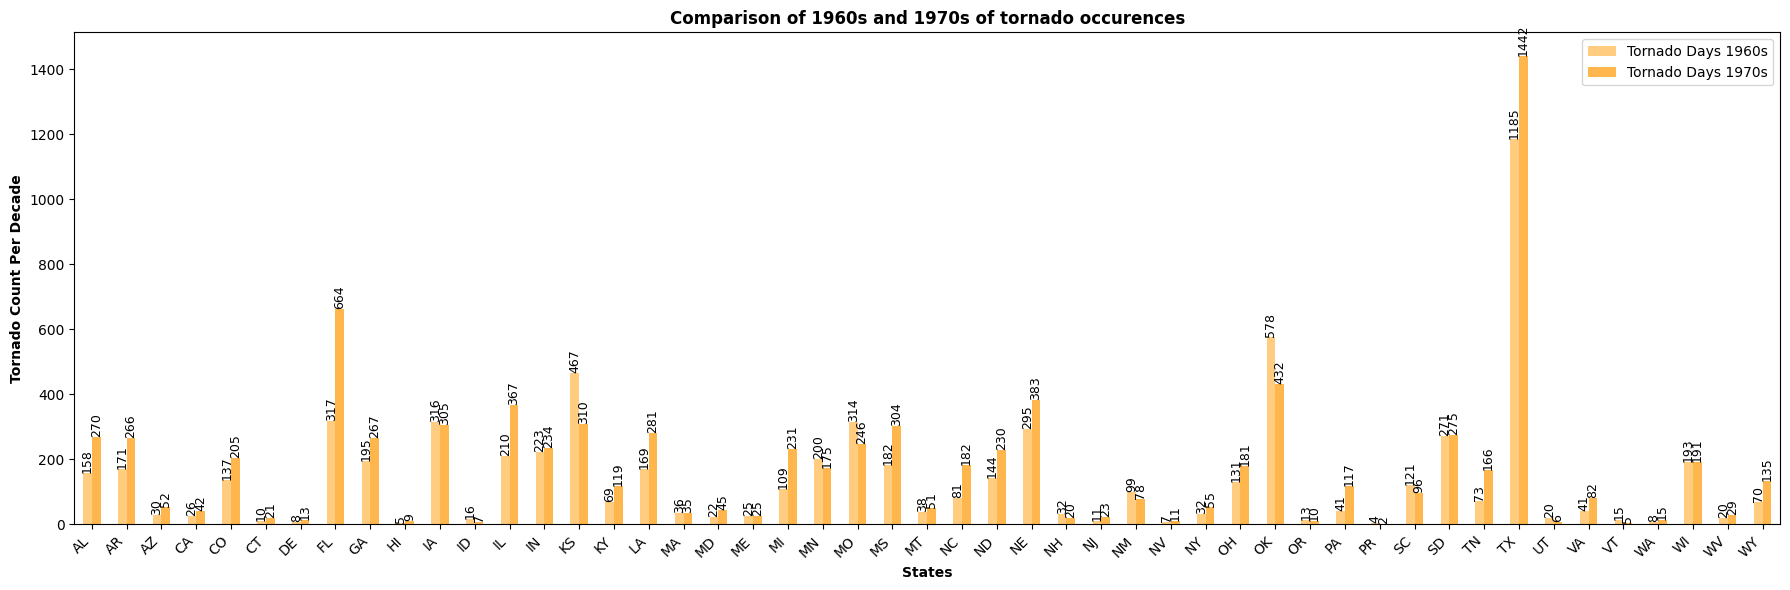

<Figure size 1800x600 with 0 Axes>

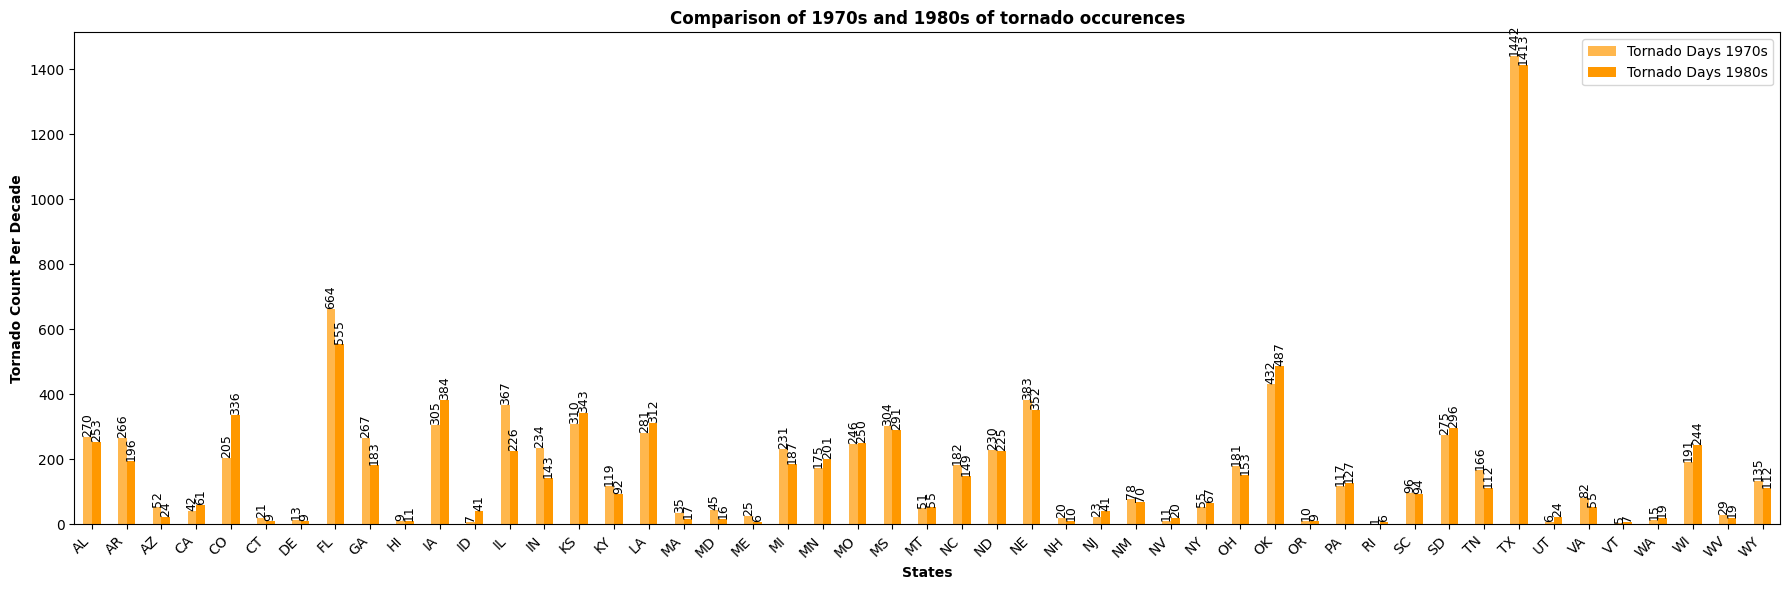

<Figure size 1800x600 with 0 Axes>

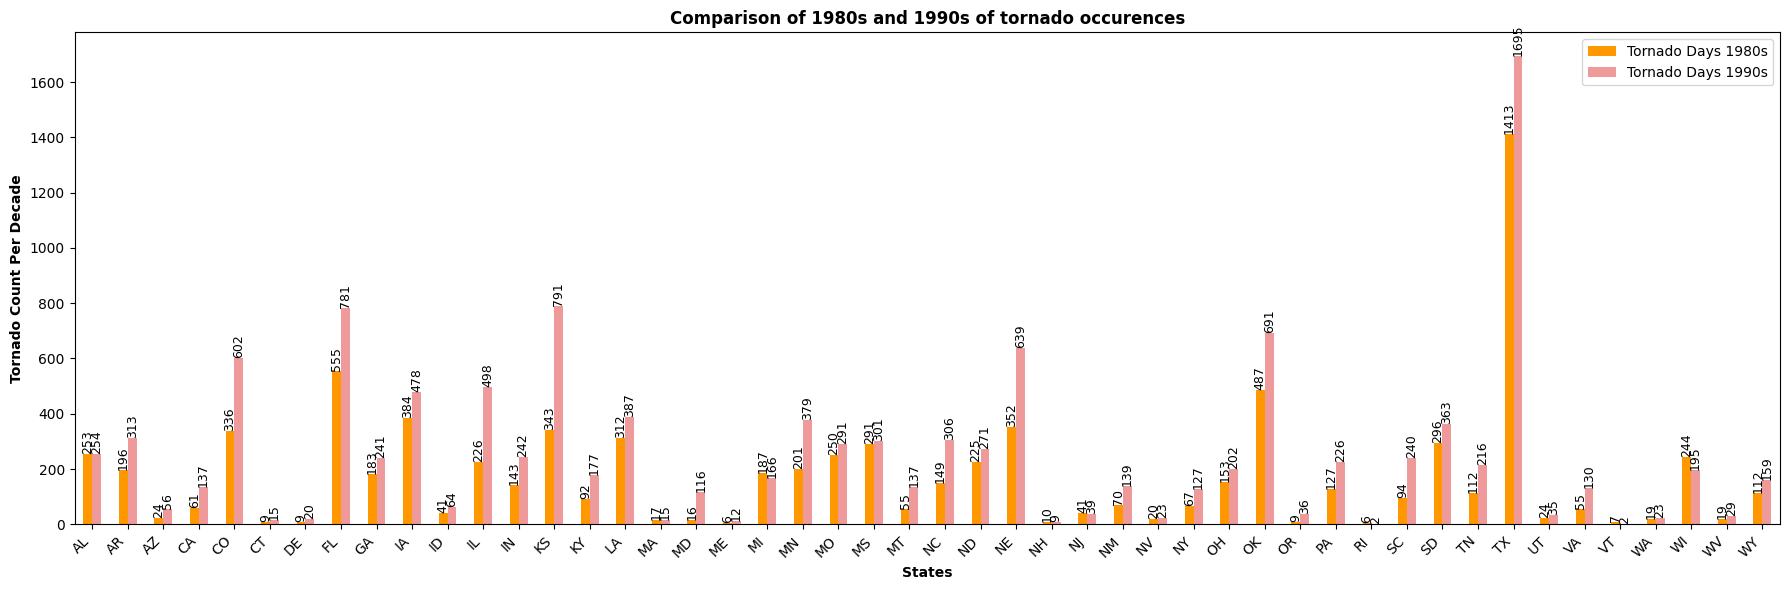

<Figure size 1800x600 with 0 Axes>

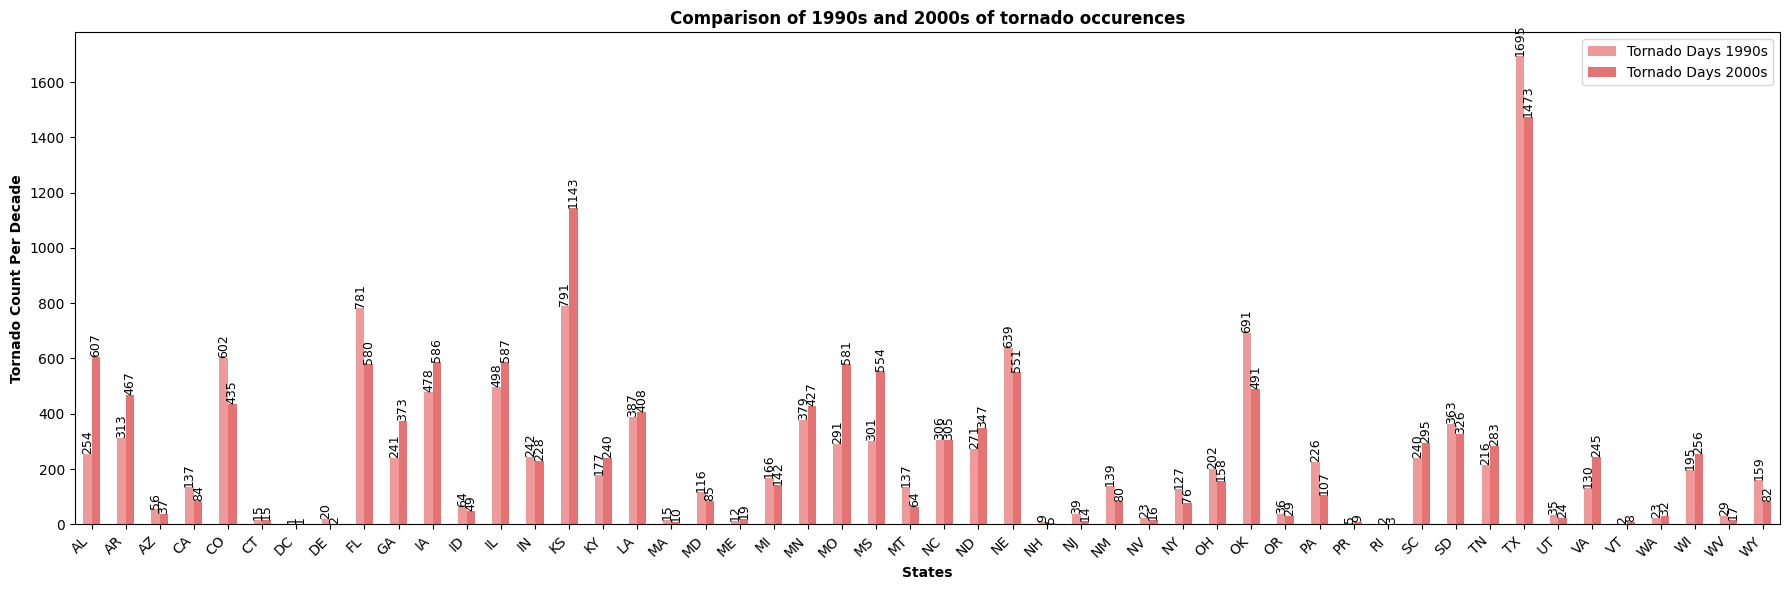

<Figure size 1800x600 with 0 Axes>

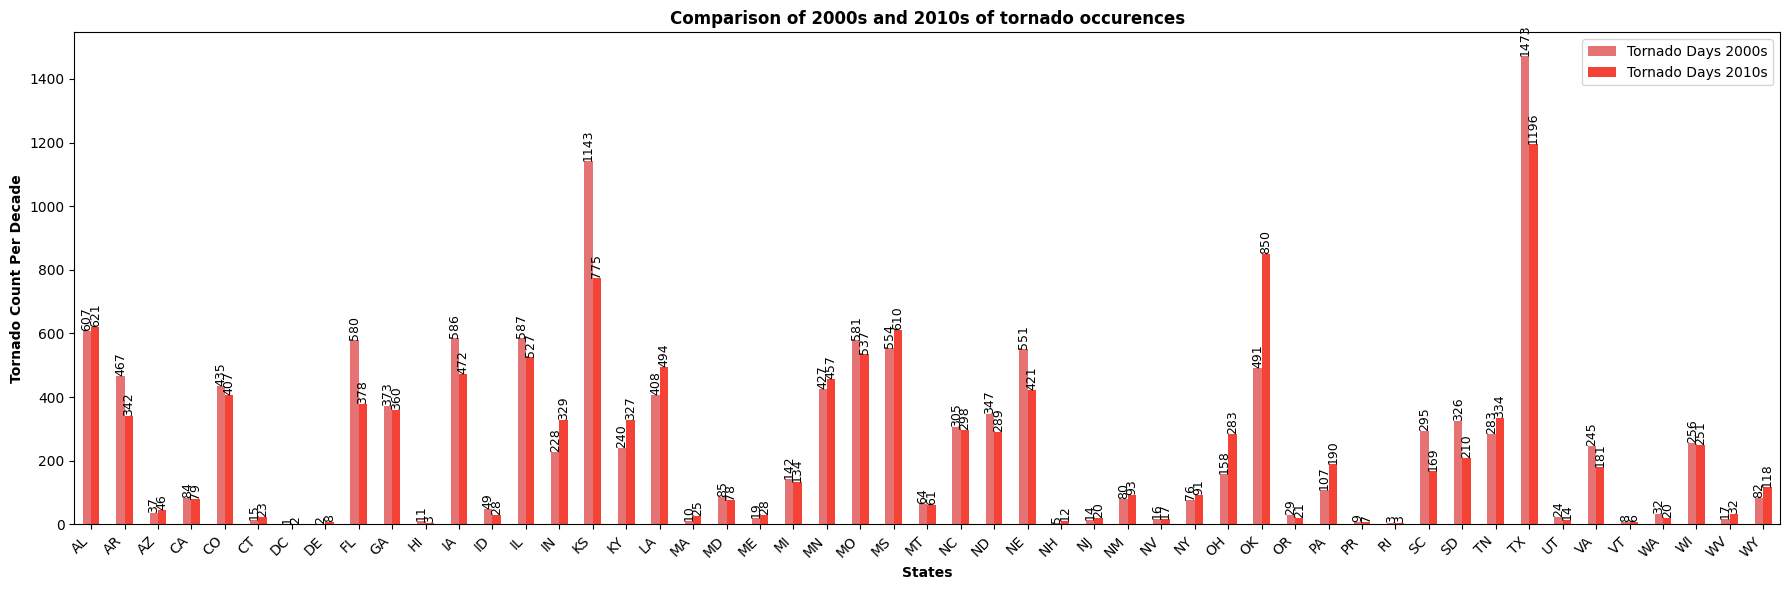

<Figure size 1800x600 with 0 Axes>

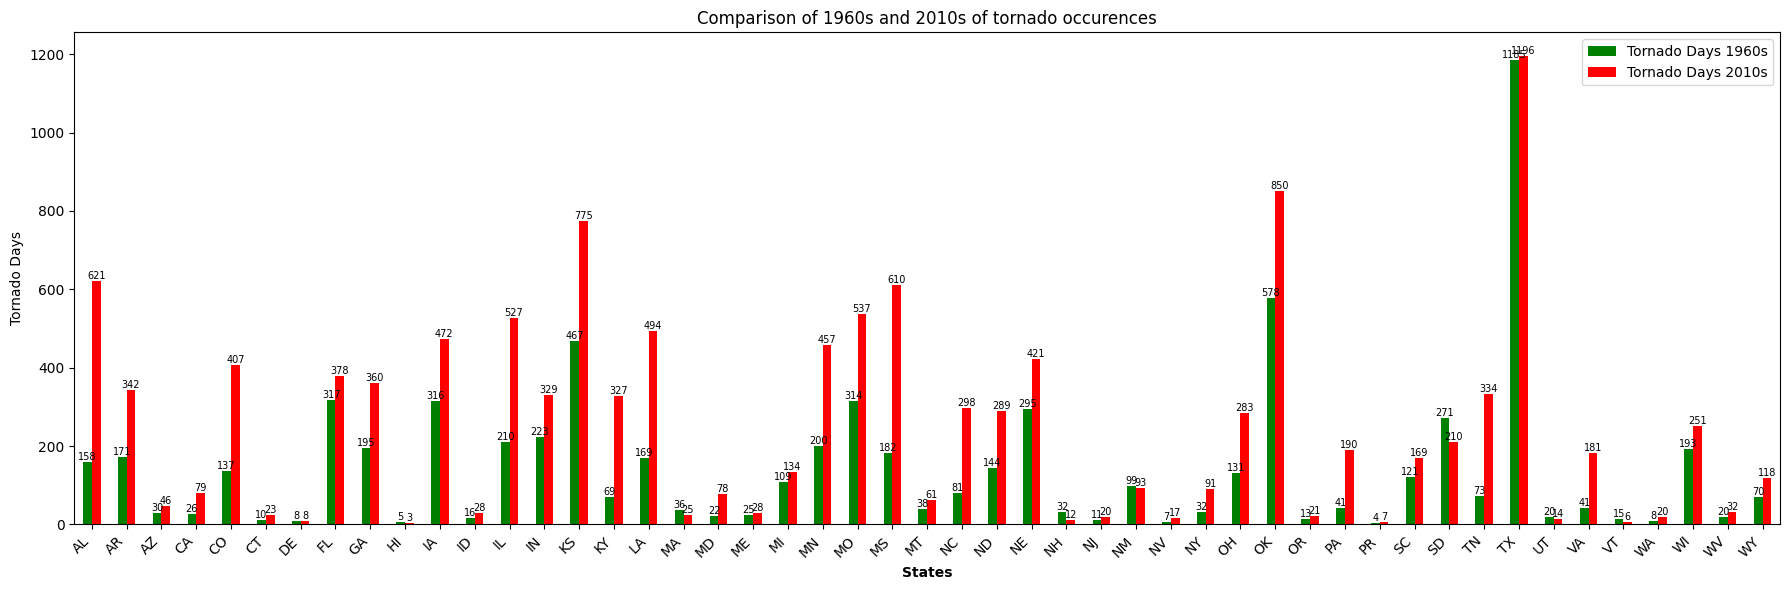

In [11]:
# Sakinah Chadrawala's Contribution
df = pd.read_csv('1950-2022_torn.csv')
df_dropped = df.dropna(how='any')
df_dropped = df.dropna(subset=['date', 'time'])

tornado_counts_1950s = df_dropped[df_dropped['yr'].astype(str).str.startswith("195")]
grouped_1950s = tornado_counts_1950s.groupby('st').size().reset_index(name='Tornado Days 1950s')

tornado_counts_2010s = df_dropped[df_dropped['yr'].astype(str).str.startswith("201")]
grouped_2010s = tornado_counts_2010s.groupby('st').size().reset_index(name='Tornado Days 2010s')

tornado_counts_1960s = df_dropped[df_dropped['yr'].astype(str).str.startswith("196")]
grouped_1960s = tornado_counts_1960s.groupby('st').size().reset_index(name='Tornado Days 1960s')

merge_50_60 = grouped_1950s.merge(grouped_1960s, on='st')
merge_50_60.set_index('st', inplace=True)
############################1950-1960#################################
plt.figure(figsize=(18, 6))
ax1 = merge_50_60.plot(kind='bar', figsize=(18, 6), color = ['springgreen' , '#FFCC80'], legend = True)
for container in ax1.containers:
    ax1.bar_label(container, size = 9,label_type = 'edge', rotation = 90 )
plt.title('Comparison of 1950s and 1960s of tornado occurences', fontweight = 'bold')
plt.xlabel('States', fontweight = 'bold')
plt.ylabel('Tornado Count Per Decade', fontweight = 'bold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
############################1960-1970#################################
tornado_counts_1970s = df_dropped[df_dropped['yr'].astype(str).str.startswith("197")]
grouped_1970s = tornado_counts_1970s.groupby('st').size().reset_index(name='Tornado Days 1970s')

merge_60_70 = grouped_1960s.merge(grouped_1970s, on='st')
merge_60_70.set_index('st', inplace=True)

plt.figure(figsize=(18, 6))
ax2 = merge_60_70.plot(kind='bar', figsize=(18, 6), color = ['#FFCC80' , '#FFB74D'],  legend = True)
for container in ax2.containers:
    ax2.bar_label(container, size = 9,label_type = 'edge', rotation = 90 )
plt.title('Comparison of 1960s and 1970s of tornado occurences', fontweight = 'bold')
plt.xlabel('States', fontweight = 'bold')
plt.ylabel('Tornado Count Per Decade', fontweight = 'bold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
############################1970-1980#################################
tornado_counts_1980s = df_dropped[df_dropped['yr'].astype(str).str.startswith("198")]
grouped_1980s = tornado_counts_1980s.groupby('st').size().reset_index(name='Tornado Days 1980s')

merge_70_80 = grouped_1970s.merge(grouped_1980s, on='st')
merge_70_80.set_index('st', inplace=True)

plt.figure(figsize=(18, 6))
ax3 = merge_70_80.plot(kind='bar', figsize=(18, 6), color = ['#FFB74D' , '#FF9800'],  legend = True)
for container in ax3.containers:
    ax3.bar_label(container, size = 9,label_type = 'edge', rotation = 90 )
plt.title('Comparison of 1970s and 1980s of tornado occurences', fontweight = 'bold')
plt.xlabel('States', fontweight = 'bold')
plt.ylabel('Tornado Count Per Decade', fontweight = 'bold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
############################1980-1990#################################
tornado_counts_1990s = df_dropped[df_dropped['yr'].astype(str).str.startswith("199")]
grouped_1990s = tornado_counts_1990s.groupby('st').size().reset_index(name='Tornado Days 1990s')

merge_80_90 = grouped_1980s.merge(grouped_1990s, on='st')
merge_80_90.set_index('st', inplace=True)

plt.figure(figsize=(18, 6))
ax4 = merge_80_90.plot(kind='bar', figsize=(18, 6), color = ['#FF9800' , '#EF9A9A'],  legend = True)
for container in ax4.containers:
    ax4.bar_label(container, size = 9,label_type = 'edge', rotation = 90 )
plt.title('Comparison of 1980s and 1990s of tornado occurences', fontweight = 'bold')
plt.xlabel('States', fontweight = 'bold')
plt.ylabel('Tornado Count Per Decade', fontweight = 'bold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
############################1990-2000#################################
tornado_counts_2000s = df_dropped[df_dropped['yr'].astype(str).str.startswith("200")]
grouped_2000s = tornado_counts_2000s.groupby('st').size().reset_index(name='Tornado Days 2000s')

merge_90_2000 = grouped_1990s.merge(grouped_2000s, on='st')
merge_90_2000.set_index('st', inplace=True)

plt.figure(figsize=(18, 6))
ax5 = merge_90_2000.plot(kind='bar', figsize=(18, 6), color = ['#EF9A9A' , '#E57373'],  legend = True)
for container in ax5.containers:
    ax5.bar_label(container, size = 9,label_type = 'edge', rotation = 90 )
plt.title('Comparison of 1990s and 2000s of tornado occurences', fontweight = 'bold')
plt.xlabel('States', fontweight = 'bold')
plt.ylabel('Tornado Count Per Decade', fontweight = 'bold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
############################2000-2010#################################
tornado_counts_2010s = df_dropped[df_dropped['yr'].astype(str).str.startswith("201")]
grouped_2010s = tornado_counts_2010s.groupby('st').size().reset_index(name='Tornado Days 2010s')

merge_2000_2010 = grouped_2000s.merge(grouped_2010s, on='st')
merge_2000_2010.set_index('st', inplace=True)

plt.figure(figsize=(18, 6))
ax6 = merge_2000_2010.plot(kind='bar', figsize=(18, 6), color = ['#E57373' , '#F44336'],  legend = True)
for container in ax6.containers:
    ax6.bar_label(container, size = 9,label_type = 'edge', rotation = 90 )
plt.title('Comparison of 2000s and 2010s of tornado occurences', fontweight = 'bold')
plt.xlabel('States', fontweight = 'bold')
plt.ylabel('Tornado Count Per Decade', fontweight = 'bold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
############################1960-2010#################################
merged_df = grouped_1960s.merge(grouped_2010s, on='st')
merged_df.set_index('st', inplace=True)

plt.figure(figsize=(18, 6))
ax = merged_df.plot(kind='bar', figsize=(18, 6), color = ['green' , 'red'],  legend = True)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', size = 7 )
plt.title('Comparison of 1960s and 2010s of tornado occurences')
plt.xlabel('States', fontweight = 'bold')
plt.ylabel('Tornado Days')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Explanation For Tornado Occurances :
The above bar graphs are visualizations of how many tornado occurences were recorded from the year 1950 to 2019 by state.
The first 6 graphs are comparison of each two years so we can analyze the results more accurately. These allows us to pick any state and get the history of it by looking through all the graphs to see how the numbers have changed.
The last graph is a comparison of 1960s and 2010s decade to compare how much increase in tornado occurence has been for over a period of 5 years.

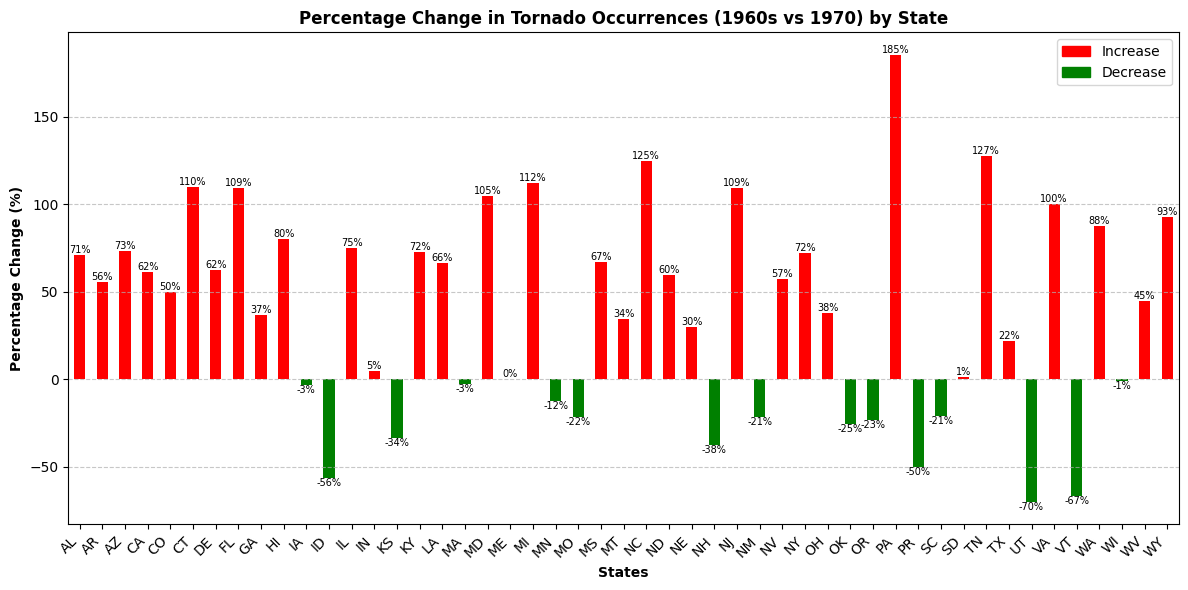

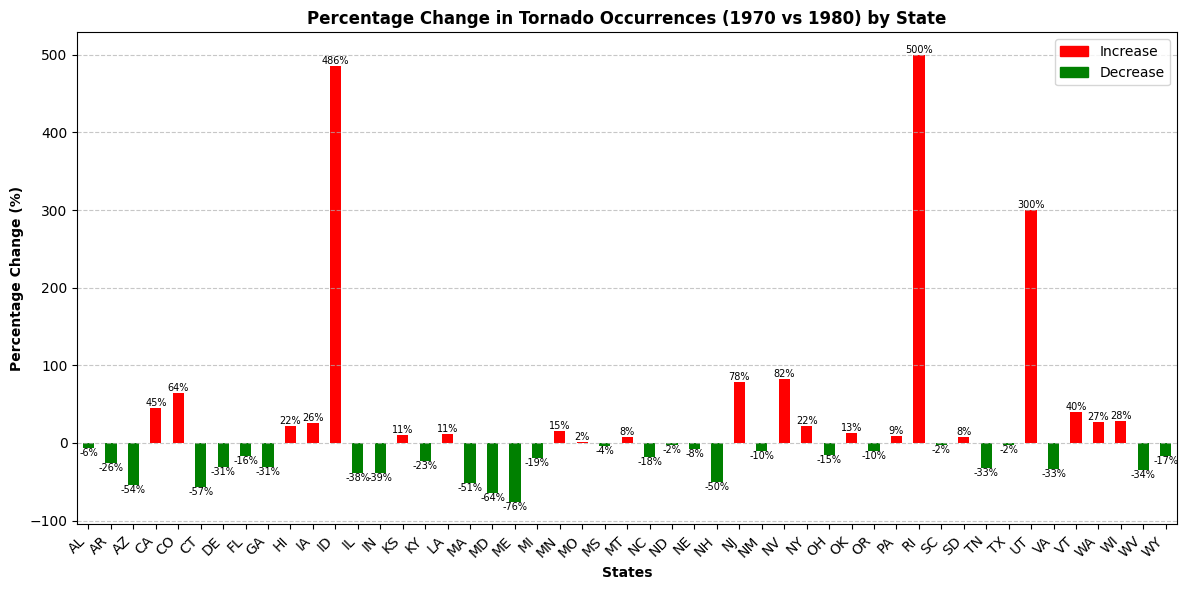

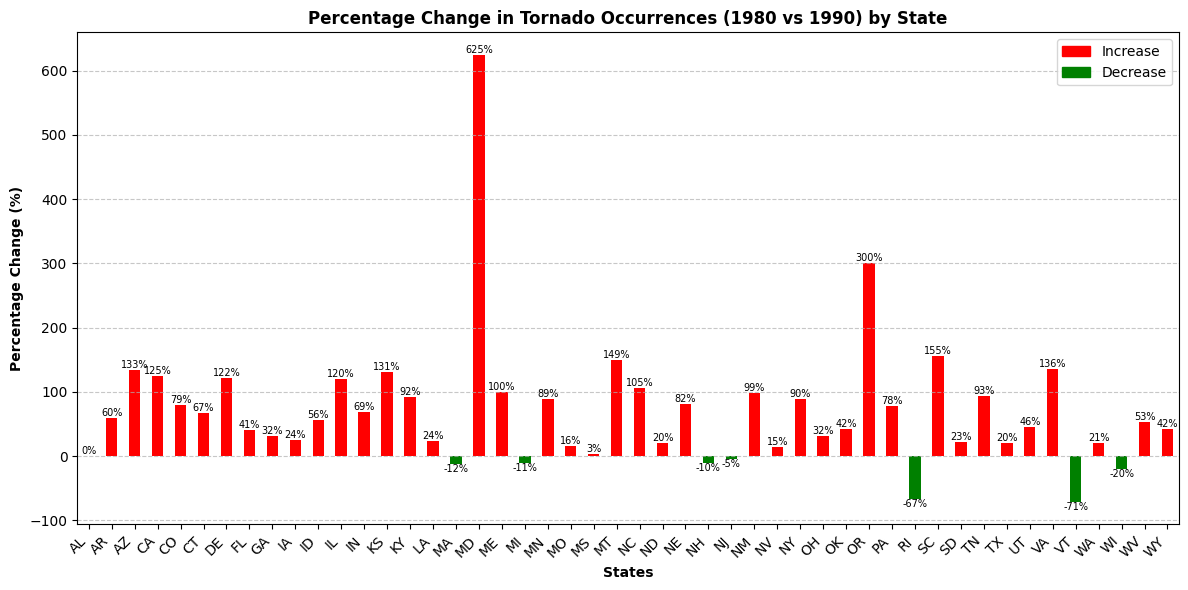

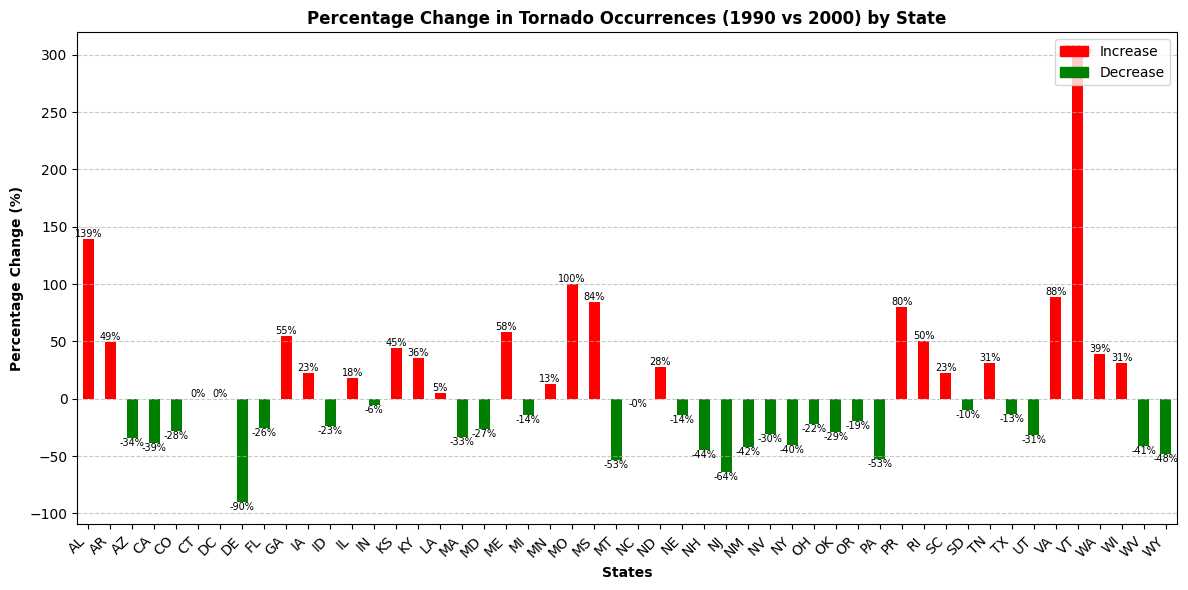

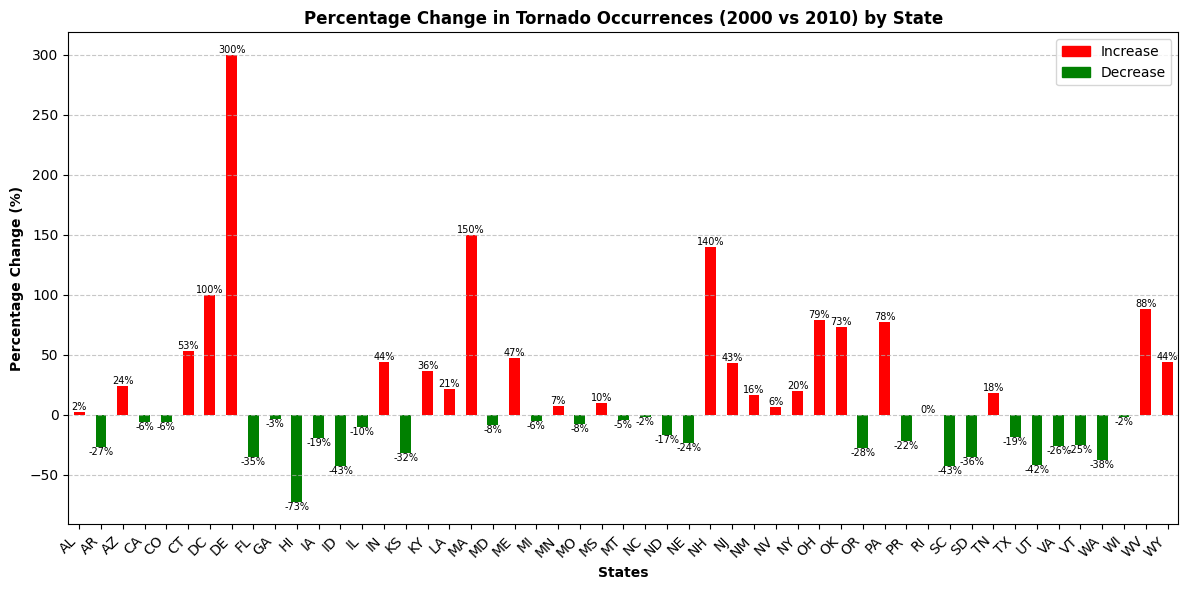

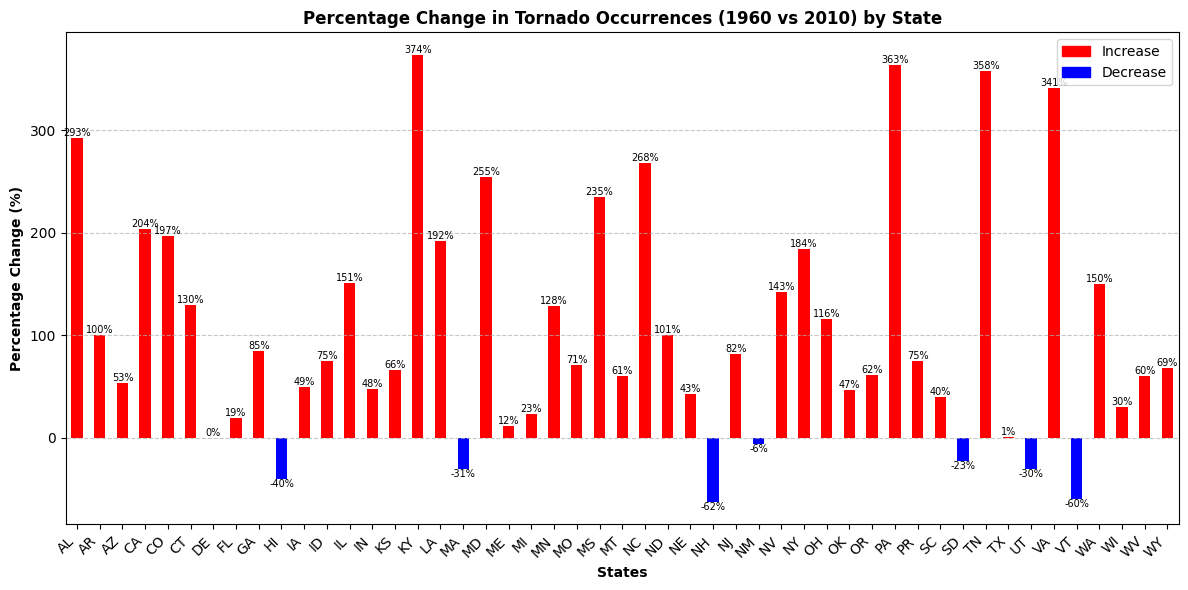

In [12]:
# Sakinah Chadrawla's Contribution
count_1960s = tornado_counts_1960s.groupby('st').size()
count_1970s = tornado_counts_1970s.groupby('st').size()
percent_change = ((count_1970s - count_1960s) / count_1960s) * 100
percent_change.dropna(inplace=True)
plt.figure(figsize=(12, 6))
colors = ['green' if change < 0 else 'red' for change in percent_change]
ax0 = percent_change.plot(kind='bar', color=colors)
plt.title('Percentage Change in Tornado Occurrences (1960s vs 1970) by State',fontweight = 'bold')
plt.xlabel('States',fontweight = 'bold')
plt.ylabel('Percentage Change (%)',fontweight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
labels = ['Increase', 'Decrease']
box = [plt.Rectangle((1,0),1,1, color='red'), plt.Rectangle((1,1),1,1, color='green')]
for container in ax0.containers:
    ax0.bar_label(container, fmt='%.0f%%', size = 7 )
plt.legend(box, labels, loc='upper right')
plt.tight_layout()
plt.show()
############################1970-1980#################################
count_1970s = tornado_counts_1970s.groupby('st').size()
count_1980s = tornado_counts_1980s.groupby('st').size()
percent_change = ((count_1980s - count_1970s) / count_1970s) * 100
percent_change.dropna(inplace=True)
plt.figure(figsize=(12, 6))
colors = ['green' if change < 0 else 'red' for change in percent_change]
ax0 = percent_change.plot(kind='bar', color=colors)
plt.title('Percentage Change in Tornado Occurrences (1970 vs 1980) by State',fontweight = 'bold')
plt.xlabel('States',fontweight = 'bold')
plt.ylabel('Percentage Change (%)',fontweight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
labels = ['Increase', 'Decrease']
box = [plt.Rectangle((1,0),1,1, color='red'), plt.Rectangle((1,1),1,1, color='green')]
for container in ax0.containers:
    ax0.bar_label(container, fmt='%.0f%%', size = 7 )
plt.legend(box, labels, loc='upper right')
plt.tight_layout()
plt.show()
############################1980-1990#################################
count_1980s = tornado_counts_1980s.groupby('st').size()
count_1990s = tornado_counts_1990s.groupby('st').size()
percent_change = ((count_1990s - count_1980s) / count_1980s) * 100
percent_change.dropna(inplace=True)
plt.figure(figsize=(12, 6))
colors = ['green' if change < 0 else 'red' for change in percent_change]
ax0 = percent_change.plot(kind='bar', color=colors)
plt.title('Percentage Change in Tornado Occurrences (1980 vs 1990) by State',fontweight = 'bold')
plt.xlabel('States',fontweight = 'bold')
plt.ylabel('Percentage Change (%)',fontweight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
labels = ['Increase', 'Decrease']
box = [plt.Rectangle((1,0),1,1, color='red'), plt.Rectangle((1,1),1,1, color='green')]
for container in ax0.containers:
    ax0.bar_label(container, fmt='%.0f%%', size = 7 )
plt.legend(box, labels, loc='upper right')
plt.tight_layout()
plt.show()
############################1990-2000#################################
count_1990s = tornado_counts_1990s.groupby('st').size()
count_2000s = tornado_counts_2000s.groupby('st').size()
percent_change = ((count_2000s - count_1990s) / count_1990s) * 100
percent_change.dropna(inplace=True)
plt.figure(figsize=(12, 6))
colors = ['green' if change < 0 else 'red' for change in percent_change]
ax0 = percent_change.plot(kind='bar', color=colors)
plt.title('Percentage Change in Tornado Occurrences (1990 vs 2000) by State',fontweight = 'bold')
plt.xlabel('States',fontweight = 'bold')
plt.ylabel('Percentage Change (%)',fontweight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
labels = ['Increase', 'Decrease']
box = [plt.Rectangle((1,0),1,1, color='red'), plt.Rectangle((1,1),1,1, color='green')]
for container in ax0.containers:
    ax0.bar_label(container, fmt='%.0f%%', size = 7 )
plt.legend(box, labels, loc='upper right')
plt.tight_layout()
plt.show()
############################2000-2010#################################
count_2000s = tornado_counts_2000s.groupby('st').size()
count_2010s = tornado_counts_2010s.groupby('st').size()
percent_change = ((count_2010s - count_2000s) / count_2000s) * 100
percent_change.dropna(inplace=True)
plt.figure(figsize=(12, 6))
colors = ['green' if change < 0 else 'red' for change in percent_change]
ax0 = percent_change.plot(kind='bar', color=colors)
plt.title('Percentage Change in Tornado Occurrences (2000 vs 2010) by State',fontweight = 'bold')
plt.xlabel('States',fontweight = 'bold')
plt.ylabel('Percentage Change (%)',fontweight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
labels = ['Increase', 'Decrease']
box = [plt.Rectangle((1,0),1,1, color='red'), plt.Rectangle((1,1),1,1, color='green')]
for container in ax0.containers:
    ax0.bar_label(container, fmt='%.0f%%', size = 7 )
plt.legend(box, labels, loc='upper right')
plt.tight_layout()
plt.show()
############################1960-2010#################################
count_1960s = tornado_counts_1960s.groupby('st').size()
count_2010s = tornado_counts_2010s.groupby('st').size()
percent_change = ((count_2010s - count_1960s) / count_1960s) * 100
percent_change.dropna(inplace=True)
plt.figure(figsize=(12, 6))
colors = ['blue' if change < 0 else 'red' for change in percent_change]
ax0 = percent_change.plot(kind='bar', color=colors)
plt.title('Percentage Change in Tornado Occurrences (1960 vs 2010) by State',fontweight = 'bold')
plt.xlabel('States',fontweight = 'bold')
plt.ylabel('Percentage Change (%)',fontweight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
labels = ['Increase', 'Decrease']
box = [plt.Rectangle((1,0),1,1, color='red'), plt.Rectangle((1,1),1,1, color='blue')]
for container in ax0.containers:
    ax0.bar_label(container, fmt='%.0f%%', size = 7 )
plt.legend(box, labels, loc='upper right')
plt.tight_layout()
plt.show()

### Explanation of % Graphs:
Above bar graphs compares two years and shows % of how much tornado counts has increased or decreased.
##### Here is what the above graphs tells us:
##### 1960s vs 1970s --> Increase in majority of states and decrease in approximately a dozen states
##### 1970s vs 1980s --> Significant decrease in most states. Low increase in few states except for couple states that have around 500% increase
##### 19780s vs 1990s --> Increase in almost all states. Decrease in less than a dozen states
##### 1990s vs 2000s --> About the same number of increase and decrease of states
##### 2000s vs 2010s --> More increase for states compared to previous year. Good decrease for few states as well
####  1960s vs 2010s --> Only 7 states had a decrease. Majority had experienced increase in the span of 5 decades. The highest increase was 374% for KY and the highest decrease was 62% for NH

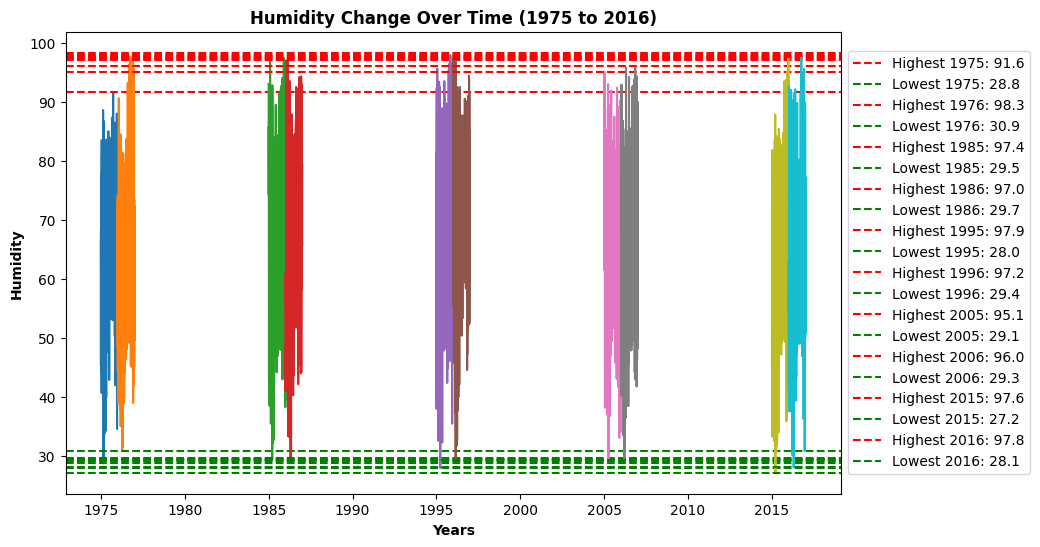

In [14]:
# Sakinah Chadrawala's Contribution
df_files = []
files = ['united states 1975-01-01 to 1976-12-31.csv', 'united states 1985-01-01 to 1986-12-31.csv', 'united states 1995-01-01 to 1996-12-31.csv','united states 2005-01-01 to 2006-12-31.csv','United states 2015-01-01 to 2016-12-31.csv']
for file in files:
    df = pd.read_csv(file)
    df_dropped = df.dropna(subset=['datetime', 'humidity'])
    df_dropped['datetime'] = pd.to_datetime(df_dropped['datetime'])
    df_dropped['year'] = df_dropped['datetime'].dt.year
    df_files.append(df_dropped)

plt.figure(figsize=(10,6))
for d in df_files:
    for year, group in d.groupby('year'):
        plt.plot(group['datetime'], group['humidity'], )
        highest_humidity = group['humidity'].max()
        lowest_humidity = group['humidity'].min()

        plt.axhline(y=highest_humidity, color = 'red', linestyle='--', label= f'Highest {year}: {highest_humidity}')
        plt.axhline(y=lowest_humidity, color = 'green', linestyle='--', label= f'Lowest {year}: {lowest_humidity}')


plt. title('Humidity Change Over Time (1975 to 2016)' ,fontweight = 'bold')
plt.xlabel('Years',fontweight = 'bold')
plt.ylabel('Humidity',fontweight = 'bold')
plt.legend(loc='center left', bbox_to_anchor=(1,0.50))
plt.show()


## Explanation for Humidity graph:
Humidity graph has data for 2 full years from each decade for five decades. We can see quite a big increase from 1975 to 1976 and then it's very stable. The lowest humidity level hasn't changed much.

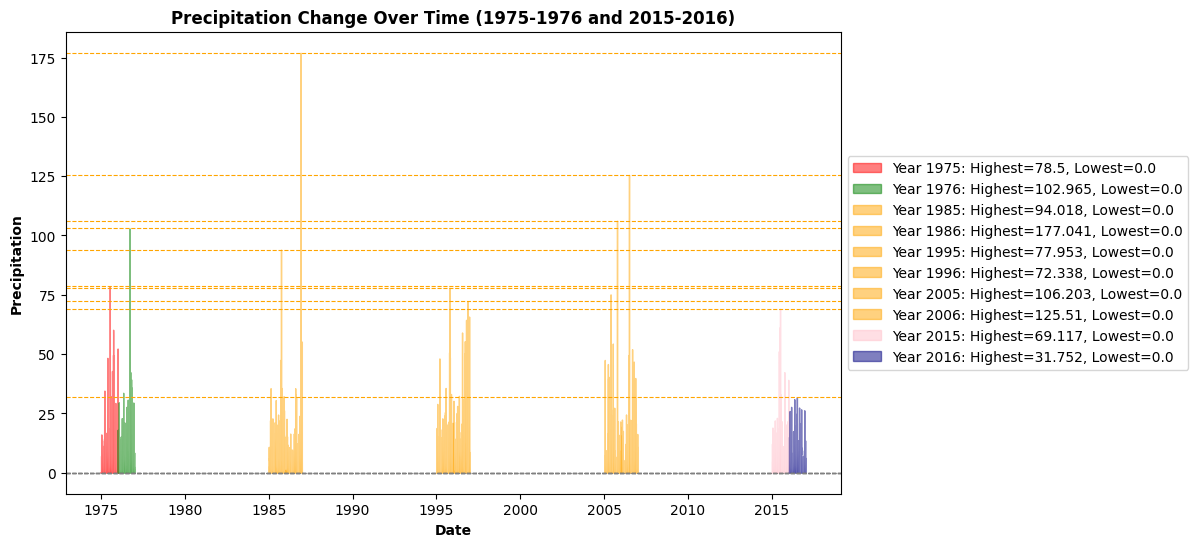

In [15]:
# Lorena Castillejo's Contribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Define colors for each year
color_mapping = {
    1975: 'red',
    1976: 'green',
    2015: 'pink',
    2016: 'navy'
}

for d in df_files:
    for year, group in d.groupby('year'):
        color = color_mapping.get(year, 'orange')  # Default color is orange for years not in mapping
        plt.fill_between(group['datetime'], group['precip'], color=color, alpha=0.5, label=f'Year {year}: Highest={group["precip"].max()}, Lowest={group["precip"].min()}')

        plt.axhline(y=group["precip"].max(), color='orange', linestyle='--', linewidth=0.8)
        plt.axhline(y=group["precip"].min(), color='gray', linestyle='--', linewidth=0.8)


plt.title('Precipitation Change Over Time (1975-1976 and 2015-2016)', fontweight='bold')
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Precipitation', fontweight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()





# Explanation for Precipitation:

This graph represents the change in precipitation per month from 1975-1976 vs 2015-2016. It is evident that there is an alarmingly low amount of precipitation for the 2000s. The highest amount of precipitation produced in a month in 2016 is about .01% of the highest produced in 1976, much closer to 0. This may indicate extreme whether conditions that may have caused a drought.


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

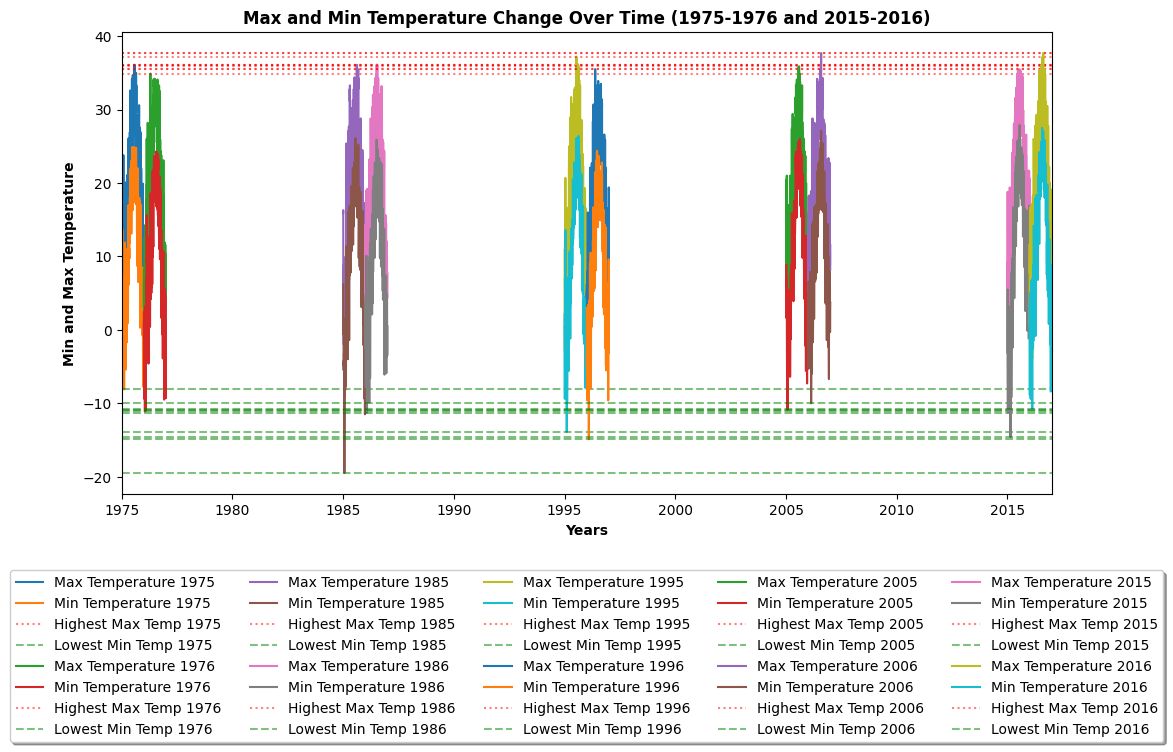

In [16]:
# Lorena Castillejo's Contribution

plt.figure(figsize=(12, 6))
for d in df_files:
    for year, group in d.groupby('year'):
        plt.plot(group['datetime'], group['tempmax'], label=f'Max Temperature {year}')
        plt.plot(group['datetime'], group['tempmin'], label=f'Min Temperature {year}')
        highest_tempmax = group['tempmax'].max()
        lowest_tempmin = group['tempmin'].min()

        plt.axhline(y=highest_tempmax, color='red', linestyle=':', label=f'Highest Max Temp {year}', alpha=0.5)
        plt.axhline(y=lowest_tempmin, color='green', linestyle='--', label=f'Lowest Min Temp {year}', alpha=0.5)

plt.title('Max and Min Temperature Change Over Time (1975-1976 and 2015-2016)', fontweight='bold')
plt.xlabel('Years', fontweight='bold')
plt.ylabel('Min and Max Temperature', fontweight='bold')

# Legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)

# Zooming into Data
plt.xlim(pd.Timestamp('1975-01-01'), pd.Timestamp('2016-12-31'))

plt.show()




# Explanation for Precipitation:

This graph represents the minimum and maximum temperatures from the years 1975-1976 vs 20015-2016. During the 1970s the minimum and maximum where on the cooler end and the difference between them is not large. When compared to the 2000s the maximum and minimum temperatures per month increased significantly. There was a peak of 100 in 2016 compared to the peak of 1975 of about 38. This indicates the weather has gotten warmer throughout the years


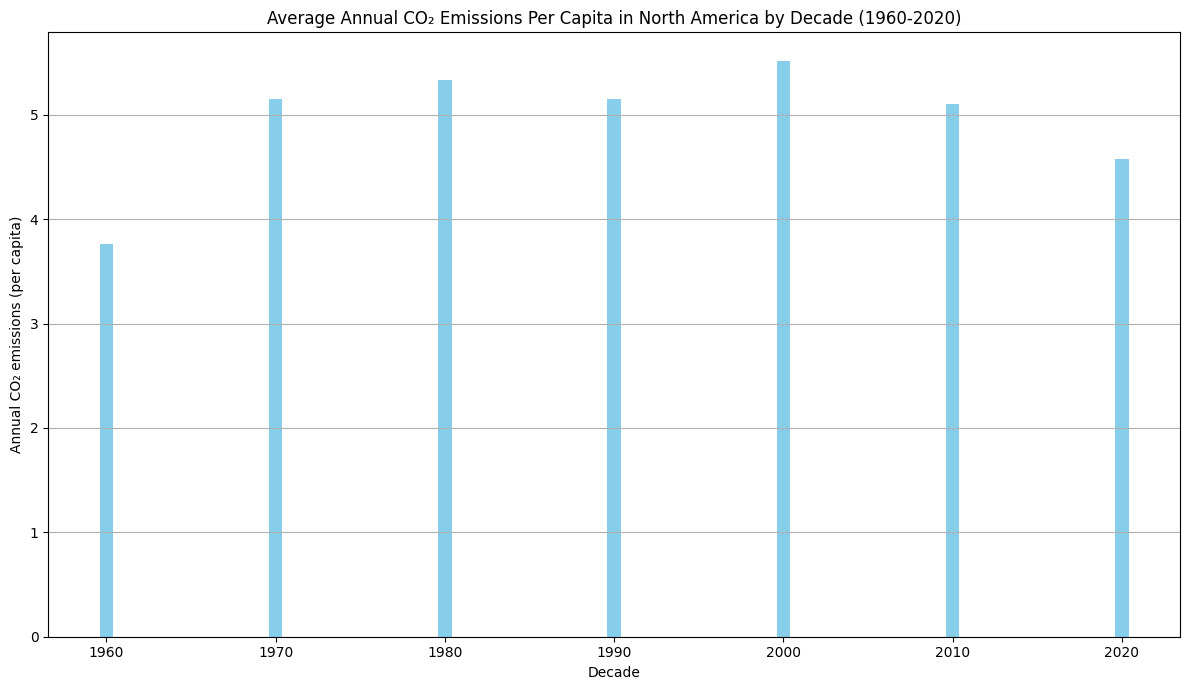

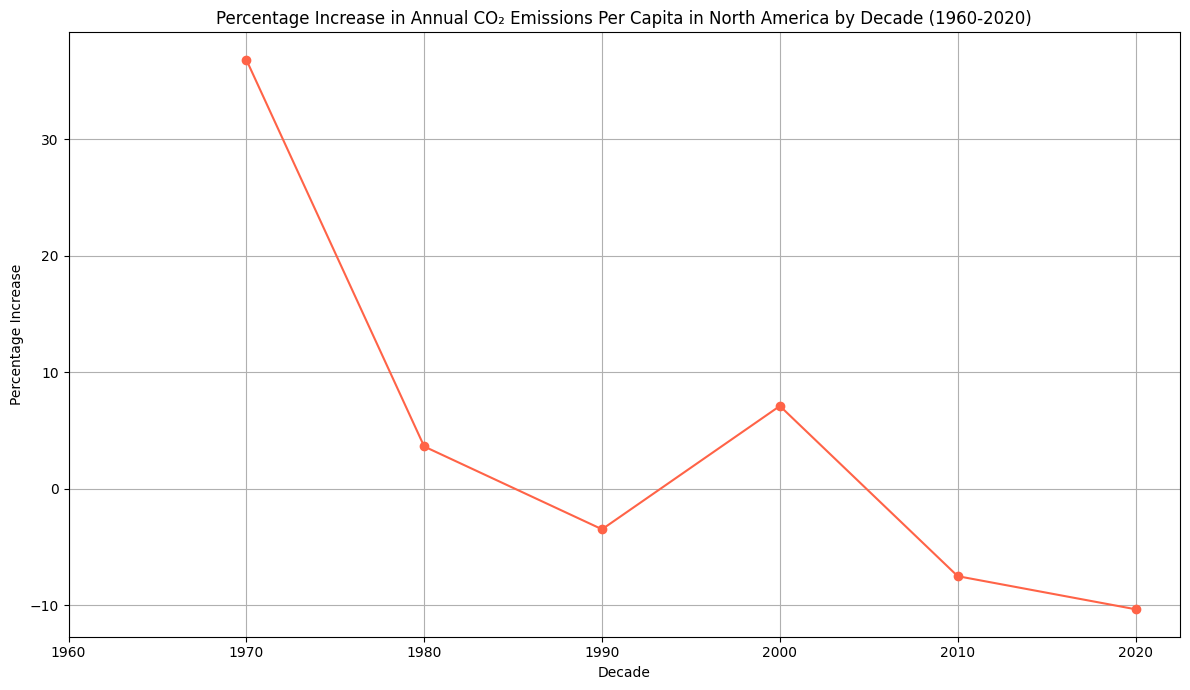

In [17]:
# Fnu Shoaib Ahmed's Contribution
# import pandas as pd
# import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv('CO2_Emissions_Data.csv')

# Filter the data for North America
north_america_data = df[df['Entity'] == 'North America (excl. USA)']

# Ensure 'Year' is numeric and calculate the decade
north_america_data['Year'] = pd.to_numeric(north_america_data['Year'])
north_america_data['Decade'] = (north_america_data['Year'] // 10) * 10

# Exclude non-numeric columns before grouping and calculating the mean
# This line is modified to focus on 'Annual CO₂ emissions (per capita)' only
decade_means = north_america_data[['Decade', 'Annual CO₂ emissions (per capita)']].groupby('Decade').mean().reset_index()

# Filter out the decades from 1960 to 2020
decade_means_filtered = decade_means[(decade_means['Decade'] >= 1960) & (decade_means['Decade'] <= 2020)]

# Bar graph for average annual CO₂ emissions per capita by decade
plt.figure(figsize=(12, 7))
plt.bar(decade_means_filtered['Decade'], decade_means_filtered['Annual CO₂ emissions (per capita)'], color='skyblue')
plt.title('Average Annual CO₂ Emissions Per Capita in North America by Decade (1960-2020)')
plt.xlabel('Decade')
plt.ylabel('Annual CO₂ emissions (per capita)')
plt.xticks(decade_means_filtered['Decade'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Calculate the percentage increase in emissions
decade_means_filtered['Percentage Increase'] = decade_means_filtered['Annual CO₂ emissions (per capita)'].pct_change() * 100

# Line graph for the percentage increase in emissions
plt.figure(figsize=(12, 7))
plt.plot(decade_means_filtered['Decade'][1:], decade_means_filtered['Percentage Increase'][1:], marker='o', linestyle='-', color='tomato')
plt.title('Percentage Increase in Annual CO₂ Emissions Per Capita in North America by Decade (1960-2020)')
plt.xlabel('Decade')
plt.ylabel('Percentage Increase')
plt.grid(True)
plt.xticks(decade_means_filtered['Decade'])
plt.tight_layout()
plt.show()


# Explanation for CO₂ Emissions:

# Bar Graph:-
Average Annual CO₂ Emissions Per Capita by Decade
The bar graph illustrates fluctuations in the average annual CO₂ emissions per capita, with visible increases and periods of stabilization over the decades. It highlights a general upward trend until the most recent decades, where emissions begin to show signs of leveling off. This pattern suggests varying impacts of industrial, economic, and policy changes on emissions over time.

# Line Graph:-
Percentage Increase in Annual CO₂ Emissions Per Capita by Decade
The line graph depicting the percentage increase in emissions per decade reveals significant variability in the rate of emissions change. Sharp increases and decreases in the growth rate underscore the impact of external factors such as policy implementations and technological advancements. The graph suggests periods of effective environmental action as well as times of increased emissions growth, reflecting the complex dynamics affecting North America's carbon footprint.

# At least two ML analyses on your dataset, along with a baseline comparison and an interpretation of the result that you obtain. Write the name of the member(s) who is responsible for it while explaining it.

Baseline comparison: Mean Squared Error  0.2919754012004964


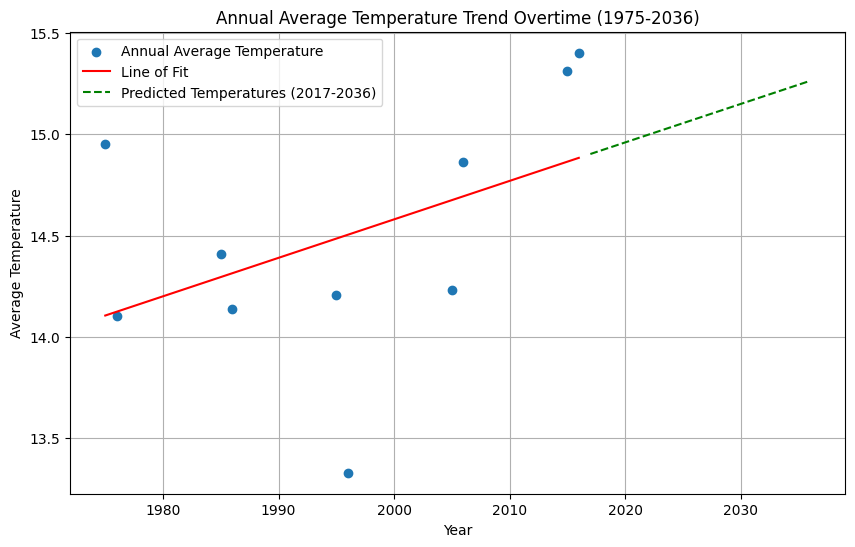

In [28]:
# Shahryar ML analysis #1 - Future Temperature Prediction


ml_df_1 = pd.read_csv("united states 1975-01-01 to 1976-12-31.csv")
ml_df_2 = pd.read_csv("united states 1985-01-01 to 1986-12-31.csv")
ml_df_3 = pd.read_csv("united states 1995-01-01 to 1996-12-31.csv")
ml_df_4 = pd.read_csv("united states 2005-01-01 to 2006-12-31.csv")
ml_df_5 = pd.read_csv("United states 2015-01-01 to 2016-12-31.csv")

# merging dataframes
merged_df = pd.concat([ml_df_1, ml_df_2, ml_df_3, ml_df_4, ml_df_5], ignore_index=True)

# converting to datetime object
merged_df['datetime'] = pd.to_datetime(merged_df['datetime'])

# group every year by its average annual temperature
merged_df['year'] = merged_df['datetime'].dt.year
annual_avg_temp = merged_df.groupby('year')['temp'].mean().reset_index()

# feature and target variable
X = annual_avg_temp[['year']]
y = annual_avg_temp['temp']

# linear regression model
model = LinearRegression()
model.fit(X, y)

# predicting next twenty years
pred_years = pd.DataFrame({'year': range(merged_df['year'].max() + 1, merged_df['year'].max() + 21)})
future_pred = model.predict(pred_years)

# mean squared error
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print("Baseline comparison: Mean Squared Error ", mse)

# plot the average temperatures
plt.figure(figsize=(10, 6))
plt.scatter(annual_avg_temp['year'], annual_avg_temp['temp'], marker='o', label='Annual Average Temperature')
plt.plot(X, model.predict(X), color='red', label='Line of Fit')
plt.plot(pred_years['year'], future_pred, linestyle='--', color='green', label='Predicted Temperatures (2017-2036)')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Annual Average Temperature Trend Overtime (1975-2036)')
plt.legend()
plt.grid(True)
plt.show()



Interpretation: The figure above is a graph of Annual Average Temperature Trend Overtime. From our data set, the annual averages are calculated and plotted. A linear model is trained for the best line of fit. The model is then used to find predictions for 2017-2036 (future temperatures outside our data set). According to this visual, average temperatures have been rising throughout time.



Baseline comparison: Mean Squared Error  0.3072780958394628


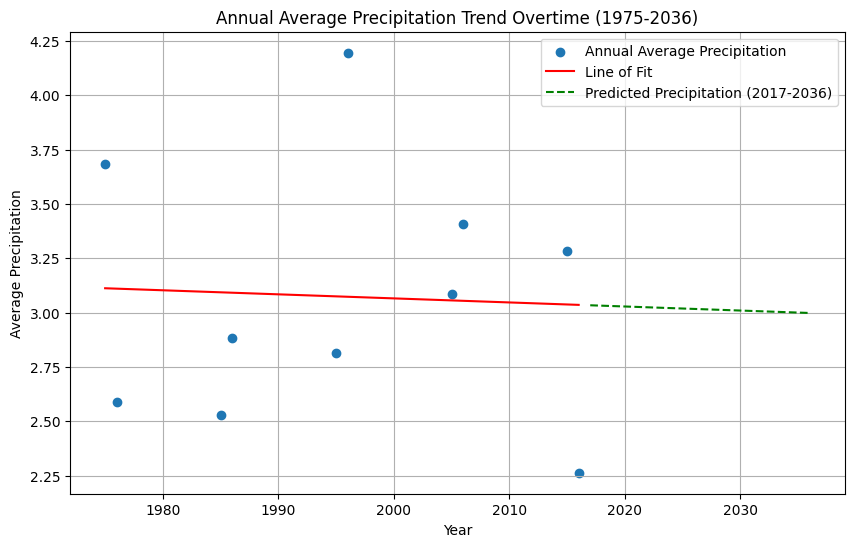

In [29]:
# Shahryar ML analysis #2 - Future Precipitation Prediction


ml_df_1 = pd.read_csv("united states 1975-01-01 to 1976-12-31.csv")
ml_df_2 = pd.read_csv("united states 1985-01-01 to 1986-12-31.csv")
ml_df_3 = pd.read_csv("united states 1995-01-01 to 1996-12-31.csv")
ml_df_4 = pd.read_csv("united states 2005-01-01 to 2006-12-31.csv")
ml_df_5 = pd.read_csv("United states 2015-01-01 to 2016-12-31.csv")

# merging dataframes
merged_df = pd.concat([ml_df_1, ml_df_2, ml_df_3, ml_df_4, ml_df_5], ignore_index=True)

# converting to datetime object
merged_df['datetime'] = pd.to_datetime(merged_df['datetime'])

# group every year by its average annual temperature
merged_df['year'] = merged_df['datetime'].dt.year
annual_avg_precip = merged_df.groupby('year')['precip'].mean().reset_index()

# feature and target variable
X = annual_avg_precip[['year']]
y = annual_avg_precip['precip']

# linear regression model
model = LinearRegression()
model.fit(X, y)

# predicting next twenty years
pred_years = pd.DataFrame({'year': range(merged_df['year'].max() + 1, merged_df['year'].max() + 21)})
future_pred = model.predict(pred_years)

# mean squared error
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print("Baseline comparison: Mean Squared Error ", mse)

# plot the average precipitation
plt.figure(figsize=(10, 6))
plt.scatter(annual_avg_precip['year'], annual_avg_precip['precip'], marker='o', label='Annual Average Precipitation')
plt.plot(X, model.predict(X), color='red', label='Line of Fit')
plt.plot(pred_years['year'], future_pred, linestyle='--', color='green', label='Predicted Precipitation (2017-2036)')
plt.xlabel('Year')
plt.ylabel('Average Precipitation')
plt.title('Annual Average Precipitation Trend Overtime (1975-2036)')
plt.legend()
plt.grid(True)
plt.show()

Interpretation: The figure above is a graph of Annual Average Precipitation Trend Overtime. From our data set, the annual averages are calculated and plotted. A linear model is trained for the best line of fit. The model is then used to find predictions for 2017-2036 (future precipitations outside our data set). According to this graph, average precipitations have been fairly constant.

# Reflection:

○  What is the most challenging part of the project that you’ve encountered so far?

*   Collecting data was challenging even for the new proposal. The reason is for tornado, hail and wind the data collected was by state and for the rest of the variables it was United States data in general.


○  What are your initial insights?


*   The initial insights from the data reveal emerging patterns that guide further analysis and hypothesis formation. These insights help identify trends and correlations for informed decision-making and deeper exploration of the data.



○  Are there any concrete results you can show at this point? If not, why not?


*   Yes, we have a visualization of different factors that play a role in climate change which can help prove our hypothesis.

○  Going forward, what are the current biggest problems you’re facing?


*   We couldn't download entire decades of data for temperature, humidity & precipitation as the visual-crossing website had a limit of downloading 1000 rows for free per account.


○  Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?


*   We think we are on track because we have enough data to conclude our hypothesis.


○  Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how will you move forward (method, data etc)?


*   I think it’s worth proceeding because we have gathered over 500,000 rows of data.




# Next Step: Concrete plans and goals for the next month

For Wind, Hail & Tornado we will get the average by combining all the states to get the general value for the United States and compare with other variables since those variables don’t have data by states. This way we will be able to make better conclusions.